# Set-up

In [330]:
import os
import pickle
import glob
import pandas as pd
import scanpy as sc
import anndata as ad
from pycisTopic.cistopic_class import *
from pycisTopic.lda_models import *
from pycisTopic.clust_vis import *

import matplotlib.pyplot as plt
import seaborn as sns

In [365]:
# Paths
models_path = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/pycistopic/filtered_signac/A2_control_filtered_signac_peakset/models.pkl"
cisTopic_path = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/pycistopic/filtered_signac/A2_control_filtered_signac_peakset.pkl"
sample_metadata_path = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/metadata/sample_metadata.tsv"
h5ad_path = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/A2_control_ATAC_bins_full.h5ad"
cellid_colors_path = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/ref/2023_11_26/cellid_colors.tsv"

# Load data

In [366]:
# Load cell id colors
cellid_colors = pd.read_csv(cellid_colors_path, sep="\t", index_col=0, header=None)
cellid_colors = cellid_colors.to_dict()[1]
cellid_colors["SC.EC.1"] = cellid_colors["SC.EC"]
cellid_colors["SC.EC.2"] = "#FFA07A"
cellid_colors

{'SC.beta': '#2a9df4',
 'SC.alpha': '#967bb6',
 'SC.EC': '#ff7f50',
 'SC.delta': '#dc143c',
 'proliferating_alpha': '#90ee90',
 'other': '#708090',
 'endocrine_progenitor': '#ff69b4',
 'SC.EC.1': '#ff7f50',
 'SC.EC.2': '#FFA07A'}

In [367]:
# Load in AnnData for plotting
adata = sc.read_h5ad(h5ad_path)
adata

AnnData object with n_obs × n_vars = 6900 × 606219
    obs: 'sample', 'log_n_fragment', 'tsse', 'leiden_1', 'sample_id', 'sample_description', 'atac_library_id', 'rna_library_id', 'batch', 'timepoint', 'condition', 'annotation', 'spectral1', 'spectral2', 'spectral3', 'spectral4', 'spectral5', 'spectral6', 'spectral7', 'spectral8', 'spectral9', 'spectral10', 'leiden_0.2', 'leiden_0.5', 'leiden_0.8', 'leiden_1.5'
    var: 'count', 'selected'
    uns: 'AnnDataSet', 'annotation_colors', 'leiden', 'leiden_0.2_colors', 'leiden_0.5_colors', 'leiden_0.8_colors', 'leiden_1.5_colors', 'leiden_1_colors', 'neighbors', 'reference_sequences', 'spectral_eigenvalue', 'timepoint_colors', 'umap'
    obsm: 'X_spectral', 'X_umap'
    obsp: 'connectivities', 'distances'

In [368]:
# Load models run
if os.path.exists(models_path):
    models = pickle.load(open(models_path, "rb"))
else:
    models_dir = os.path.dirname(models_path)
    models = []
    for model in glob.glob(os.path.join(models_dir, "*.pkl")):
        models.append(pickle.load(open(model, 'rb')))
models

In [369]:
# Load cisTopic object
cistopic_obj = pickle.load(open(cisTopic_path, "rb"))
cistopic_obj.cell_data.head()

cisTopic_nr_frag  \
dm25a#AAACAGCCATTGTGCA-1___A2_control_filtered_...             3905   
dm25a#AAACATGCAATTGAGA-1___A2_control_filtered_...             8923   
dm25a#AAACCAACAGTAGCCT-1___A2_control_filtered_...             3059   
dm25a#AAACCAACAGTCTAAT-1___A2_control_filtered_...             3842   
dm25a#AAACCAACATAAGCAA-1___A2_control_filtered_...             8247   

                                                   cisTopic_log_nr_acc  \
dm25a#AAACAGCCATTGTGCA-1___A2_control_filtered_...            3.551938   
dm25a#AAACATGCAATTGAGA-1___A2_control_filtered_...            3.855701   
dm25a#AAACCAACAGTAGCCT-1___A2_control_filtered_...            3.451479   
dm25a#AAACCAACAGTCTAAT-1___A2_control_filtered_...            3.547898   
dm25a#AAACCAACATAAGCAA-1___A2_control_filtered_...            3.837146   

                                                   cisTopic_nr_acc  \
dm25a#AAACAGCCATTGTGCA-1___A2_control_filtered_...            3564   
dm25a#AAACATGCAATTGAGA-1___A2_control_filtered_...            7173   
dm25a#AAACCAACAGTAGCCT-1___A2_control_filtered_...            2828   
dm25a#AAACCAACAGTCTAAT-1___A2_control_filtered_...            3531   
dm25a#AAACCAACATAAGCAA-1___A2_control_filtered_...            6873   

                                                   cisTopic_log_nr_frag  \
dm25a#AAACAGCCATTGTGCA-1___A2_control_filtered_...             3.591621   
dm25a#AAACATGCAATTGAGA-1___A2_control_filtered_...             3.950511   
dm25a#AAACCAACAGTAGCCT-1___A2_control_filtered_...             3.485579   
dm25a#AAACCAACAGTCTAAT-1___A2_control_filtered_...             3.584557   
dm25a#AAACCAACATAAGCAA-1___A2_control_filtered_...             3.916296   

                                                   gex_barcode_cellranger  \
dm25a#AAACAGCCATTGTGCA-1___A2_control_filtered_...     AAACAGCCATTGTGCA-1   
dm25a#AAACATGCAATTGAGA-1___A2_control_filtered_...     AAACATGCAATTGAGA-1   
dm25a#AAACCAACAGTAGCCT-1___A2_control_filtered_...     AAACCAACAGTAGCCT-1   
dm25a#AAACCAACAGTCTAAT-1___A2_control_filtered_...     AAACCAACAGTCTAAT-1   
dm25a#AAACCAACATAAGCAA-1___A2_control_filtered_...     AAACCAACATAAGCAA-1   

                                                   atac_barcode_cellranger  \
dm25a#AAACAGCCATTGTGCA-1___A2_control_filtered_...      ACAGCGGGTTAGCCAT-1   
dm25a#AAACATGCAATTGAGA-1___A2_control_filtered_...      CATTTAGGTCCTGCAA-1   
dm25a#AAACCAACAGTAGCCT-1___A2_control_filtered_...      CTTTATCGTTGCTCAG-1   
dm25a#AAACCAACAGTCTAAT-1___A2_control_filtered_...      CTTTATCGTTAGTACC-1   
dm25a#AAACCAACATAAGCAA-1___A2_control_filtered_...      CTTTATCGTAAGGCCG-1   

                                                    is_cell_cellranger  \
dm25a#AAACAGCCATTGTGCA-1___A2_control_filtered_...                   1   
dm25a#AAACATGCAATTGAGA-1___A2_control_filtered_...                   1   
dm25a#AAACCAACAGTAGCCT-1___A2_control_filtered_...                   1   
dm25a#AAACCAACAGTCTAAT-1___A2_control_filtered_...                   1   
dm25a#AAACCAACATAAGCAA-1___A2_control_filtered_...                   1   

                                                    excluded_reason_cellranger  \
dm25a#AAACAGCCATTGTGCA-1___A2_control_filtered_...                           0   
dm25a#AAACATGCAATTGAGA-1___A2_control_filtered_...                           0   
dm25a#AAACCAACAGTAGCCT-1___A2_control_filtered_...                           0   
dm25a#AAACCAACAGTCTAAT-1___A2_control_filtered_...                           0   
dm25a#AAACCAACATAAGCAA-1___A2_control_filtered_...                           0   

                                                    gex_raw_reads_cellranger  \
dm25a#AAACAGCCATTGTGCA-1___A2_control_filtered_...                     32953   
dm25a#AAACATGCAATTGAGA-1___A2_control_filtered_...                      9061   
dm25a#AAACCAACAGTAGCCT-1___A2_control_filtered_...                     18510   
dm25a#AAACCAACAGTCTAAT-1___A2_control_filtered_...                     16760   
dm25a#AAACCAACATAAGCAA-1___A2_control

In [370]:
# Grab cell data
cell_data = cistopic_obj.cell_data.copy()
cell_data.index = cell_data.index.str.split("_", expand=True).get_level_values(0)
cell_data = cell_data.filter(like="cisTopic")
cell_data.head()

cisTopic_nr_frag cisTopic_log_nr_acc cisTopic_nr_acc  \
dm25a#AAACAGCCATTGTGCA-1             3905            3.551938            3564   
dm25a#AAACATGCAATTGAGA-1             8923            3.855701            7173   
dm25a#AAACCAACAGTAGCCT-1             3059            3.451479            2828   
dm25a#AAACCAACAGTCTAAT-1             3842            3.547898            3531   
dm25a#AAACCAACATAAGCAA-1             8247            3.837146            6873   

                         cisTopic_log_nr_frag  
dm25a#AAACAGCCATTGTGCA-1             3.591621  
dm25a#AAACATGCAATTGAGA-1             3.950511  
dm25a#AAACCAACAGTAGCCT-1             3.485579  
dm25a#AAACCAACAGTCTAAT-1             3.584557  
dm25a#AAACCAACATAAGCAA-1             3.916296

In [371]:
# Join
adata.obs = adata.obs.join(cell_data)
adata.obs

sample  log_n_fragment       tsse leiden_1 sample_id  \
dm25a#AAACAGCCATTGTGCA-1  dm25a        3.991758  18.440083        2     dm25a   
dm25a#AAACATGCAATTGAGA-1  dm25a        4.302396  20.293587        2     dm25a   
dm25a#AAACCGAAGCCATCAG-1  dm25a        4.395029  18.032961        2     dm25a   
dm25a#AAACCGGCAGGTTACC-1  dm25a        4.530110  17.619494        2     dm25a   
dm25a#AAACCGGCAGTTATCG-1  dm25a        4.355394  20.698254        2     dm25a   
...                         ...             ...        ...      ...       ...   
dm45a#TTAACTGAGGAACCAA-1  dm45a        4.595838  16.471647        7     dm45a   
dm45a#TTACGTTTCATGTCAA-1  dm45a        4.589324  16.973674        7     dm45a   
dm45a#TTACGTTTCCTCATGC-1  dm45a        4.546148  15.811581        7     dm45a   
dm45a#TTCAGCACACTCGCTC-1  dm45a        4.459046  18.103364        7     dm45a   
dm45a#TTTCGTCCAGCTCATA-1  dm45a        4.473312  20.101881        7     dm45a   

                         sample_description atac_library_id rna_library_id  \
dm25a#AAACAGCCATTGTGCA-1       24hr_control           WB_19          WB_20   
dm25a#AAACATGCAATTGAGA-1       24hr_control           WB_19          WB_20   
dm25a#AAACCGAAGCCATCAG-1       24hr_control           WB_19          WB_20   
dm25a#AAACCGGCAGGTTACC-1       24hr_control           WB_19          WB_20   
dm25a#AAACCGGCAGTTATCG-1       24hr_control           WB_19          WB_20   
...                                     ...             ...            ...   
dm45a#TTAACTGAGGAACCAA-1       72hr_control           WB_53          WB_54   
dm45a#TTACGTTTCATGTCAA-1       72hr_control           WB_53          WB_54   
dm45a#TTACGTTTCCTCATGC-1       72hr_control           WB_53          WB_54   
dm45a#TTCAGCACACTCGCTC-1       72hr_control           WB_53          WB_54   
dm45a#TTTCGTCCAGCTCATA-1       72hr_control           WB_53          WB_54   

                         batch timepoint  ... spectral9 spectral10  \
dm25a#AAACAGCCATTGTGCA-1    A2        24  ...  0.000046  -0.000158   
dm25a#AAACATGCAATTGAGA-1    A2        24  ...  0.000011   0.000026   
dm25a#AAACCGAAGCCATCAG-1    A2        24  ...  0.000030  -0.000090   
dm25a#AAACCGGCAGGTTACC-1    A2        24  ... -0.000042  -0.000055   
dm25a#AAACCGGCAGTTATCG-1    A2        24  ... -0.000113  -0.000106   
...                        ...       ...  ...       ...        ...   
dm45a#TTAACTGAGGAACCAA-1    A2        72  ... -0.000136  -0.000171   
dm45a#TTACGTTTCATGTCAA-1    A2        72  ... -0.000094  -0.000032   
dm45a#TTACGTTTCCTCATGC-1    A2        72  ...  0.000038  -0.000016   
dm45a#TTCAGCACACTCGCTC-1    A2        72  ... -0.000119  -0.000083   
dm45a#TTTCGTCCAGCTCATA-1    A2        72  ... -0.000057  -0.000141   

                          leiden_0.2  leiden_0.5  leiden_0.8  leiden_1.5  \
dm25a#AAACAGCCATTGTGCA-1           0           2           3           2   
dm25a#AAACATGCAATTGAGA-1           0           2           3           2   
dm25a#AAACCGAAGCCATCAG-1           0           2           3           2   
dm25a#AAACCGGCAGGTTACC-1           0           2           3          14   
dm25a#AAACCGGCAGTTATCG-1           0           2           3           2   
...                              ...         ...         ...         ...   
dm45a#TTAACTGAGGAACCAA-1           2           4           2          12   
dm45a#TTACGTTTCATGTCAA-1           2           4           2          12   
dm45a#TTACGTTTCCTCATGC-1           2           4           2          12   
dm45a#TTCAGCACACTCGCTC-1           2           4           2          12   
dm45a#TTTCGTCCAGCTCATA-1           2           4           2          12   

                          cisTopic_nr_frag  cisTopic_log_nr_acc  \
dm25a#AAACAGCCATTGTGCA-1              3905             3.551938   
dm25a#AAACATGCAATTGAGA-1              8923             3.855701   
dm25a#AAACCGAAGCCATCAG-1             10111             3.912859   
dm25a#AAACCGGCAGGTTACC-1             12194             3.983085   
dm25a#AAACCGGCAGTTATCG-1  

In [372]:
# Keep only barcodes in cisTopic object
adata = adata[~adata.obs["cisTopic_log_nr_frag"].isna()]

In [373]:
# Remove any colors that are not in the data
cellid_colors = {k: v for k, v in cellid_colors.items() if k in adata.obs["annotation"].unique()}
adata.obs["annotation"] = adata.obs["annotation"].astype("category")
adata.obs["annotation"] = adata.obs["annotation"].cat.reorder_categories(cellid_colors.keys())
adata.uns["annotation_colors"] = list(cellid_colors.values())

/tmp/ipykernel_368568/524993768.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["annotation"] = adata.obs["annotation"].astype("category")


# Inspect all models

Running 2 topics
Running cisTopic UMAP
2024-03-20 09:44:25,090 cisTopic     INFO     Running UMAP


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Running scanpy UMAP


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/umap/umap_.py:1393: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


Running 4 topics
Running cisTopic UMAP
2024-03-20 09:45:22,735 cisTopic     INFO     Running UMAP


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Running scanpy UMAP


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/umap/umap_.py:1393: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


Running 8 topics
Running cisTopic UMAP
2024-03-20 09:45:45,138 cisTopic     INFO     Running UMAP


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Running scanpy UMAP


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/umap/umap_.py:1393: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


Running 16 topics
Running cisTopic UMAP
2024-03-20 09:46:08,696 cisTopic     INFO     Running UMAP


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Running scanpy UMAP


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/umap/umap_.py:1393: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


Running 32 topics
Running cisTopic UMAP
2024-03-20 09:46:33,856 cisTopic     INFO     Running UMAP


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Running scanpy UMAP


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/umap/umap_.py:1393: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


Running 48 topics
Running cisTopic UMAP
2024-03-20 09:46:59,741 cisTopic     INFO     Running UMAP


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Running scanpy UMAP


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/umap/umap_.py:1393: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


Running 64 topics
Running cisTopic UMAP
2024-03-20 09:47:25,972 cisTopic     INFO     Running UMAP


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Running scanpy UMAP


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/umap/umap_.py:1393: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


Running 80 topics
Running cisTopic UMAP
2024-03-20 09:47:52,681 cisTopic     INFO     Running UMAP


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Running scanpy UMAP


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/umap/umap_.py:1393: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


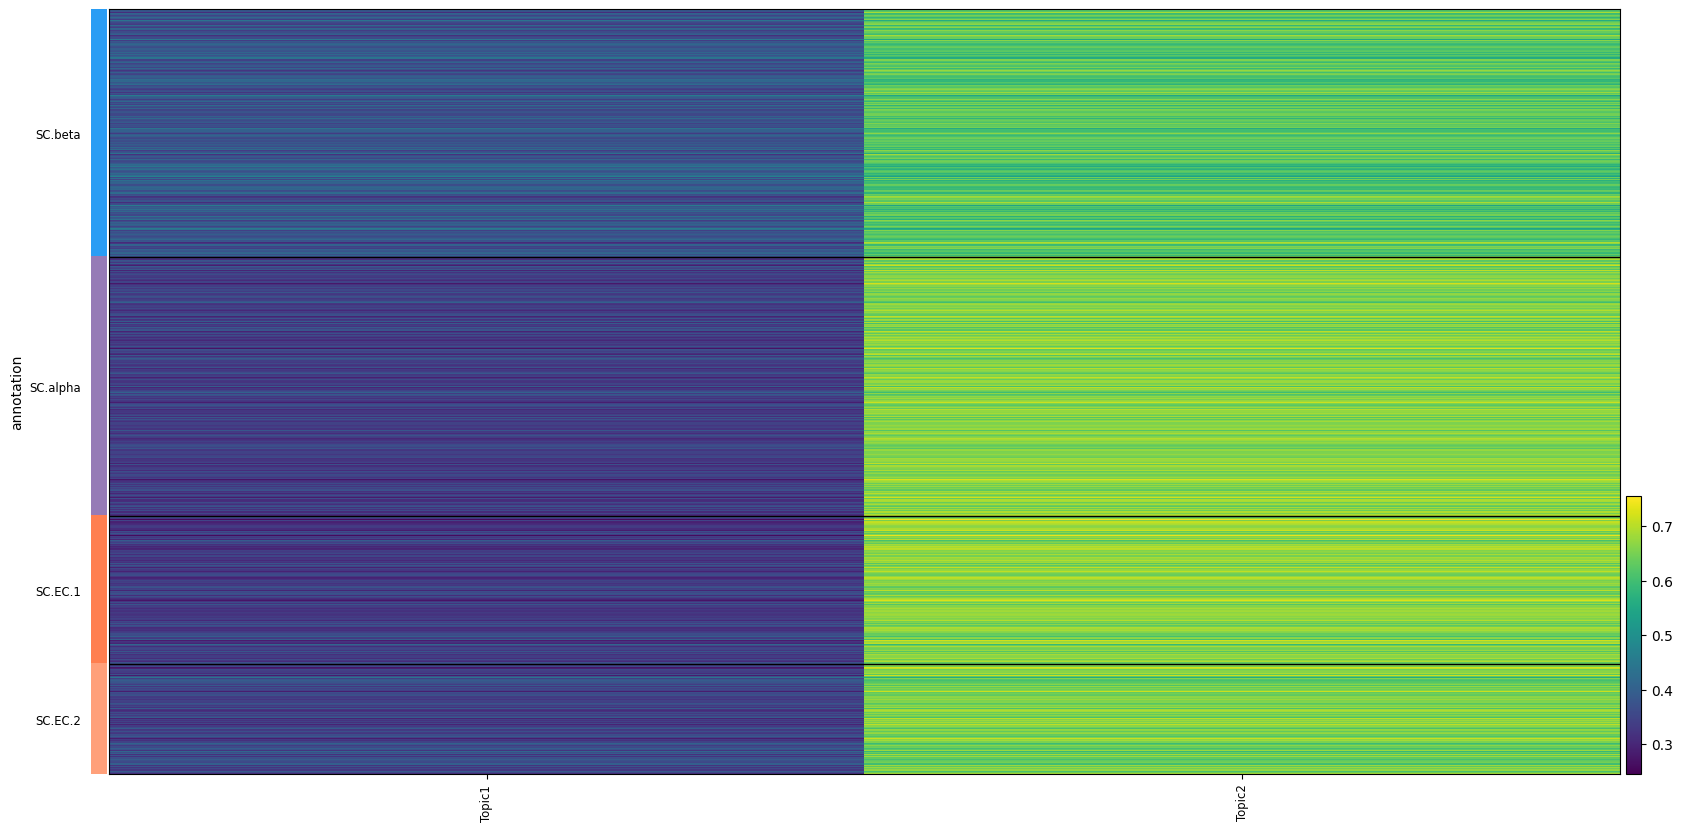

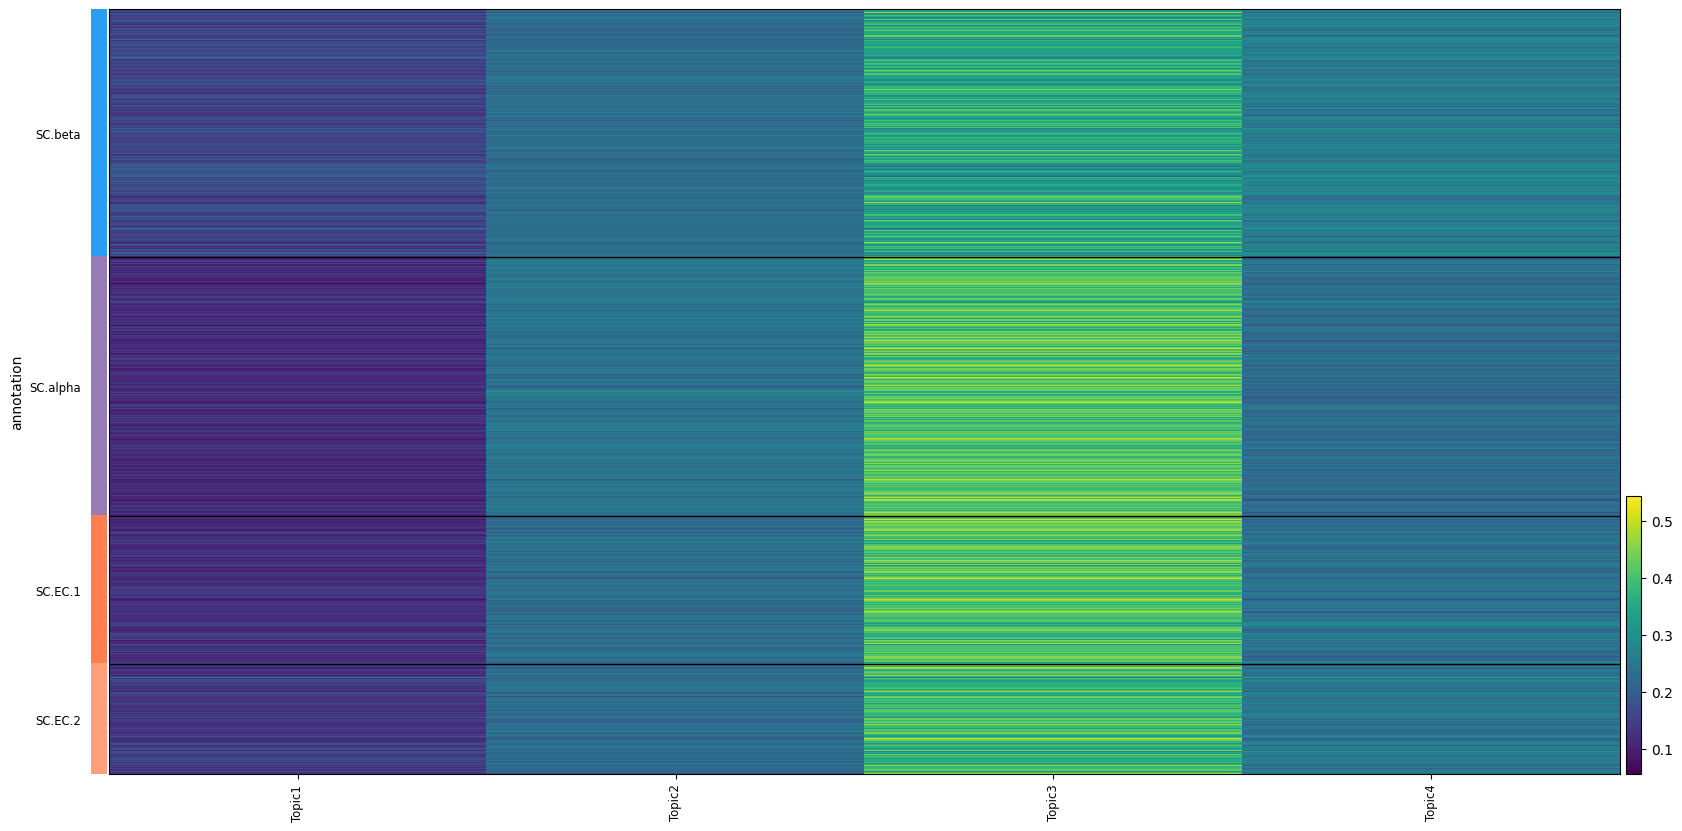

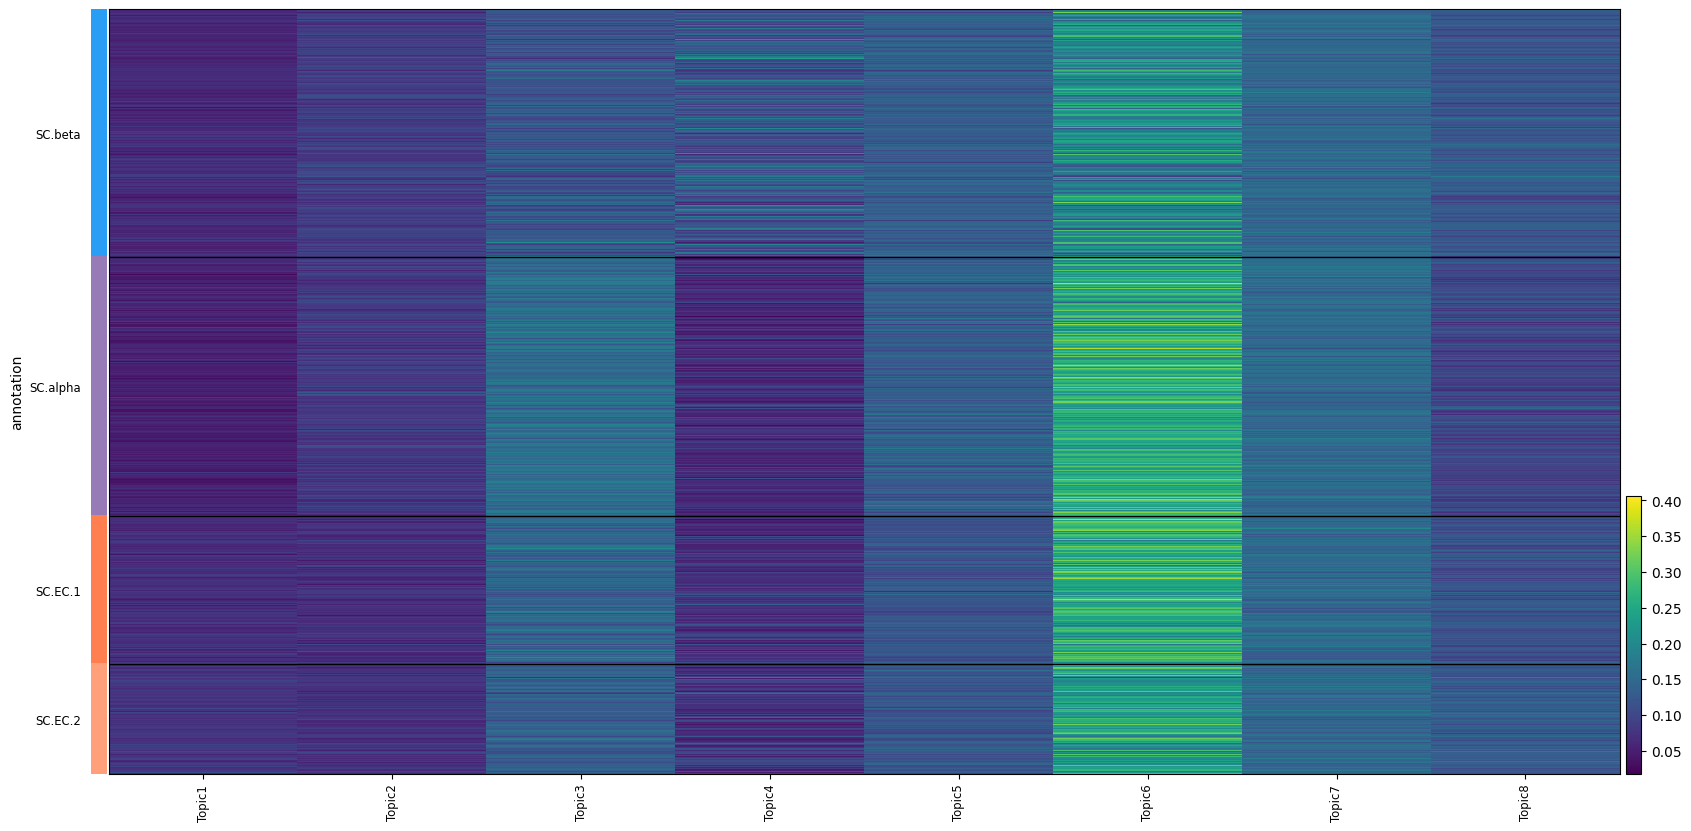

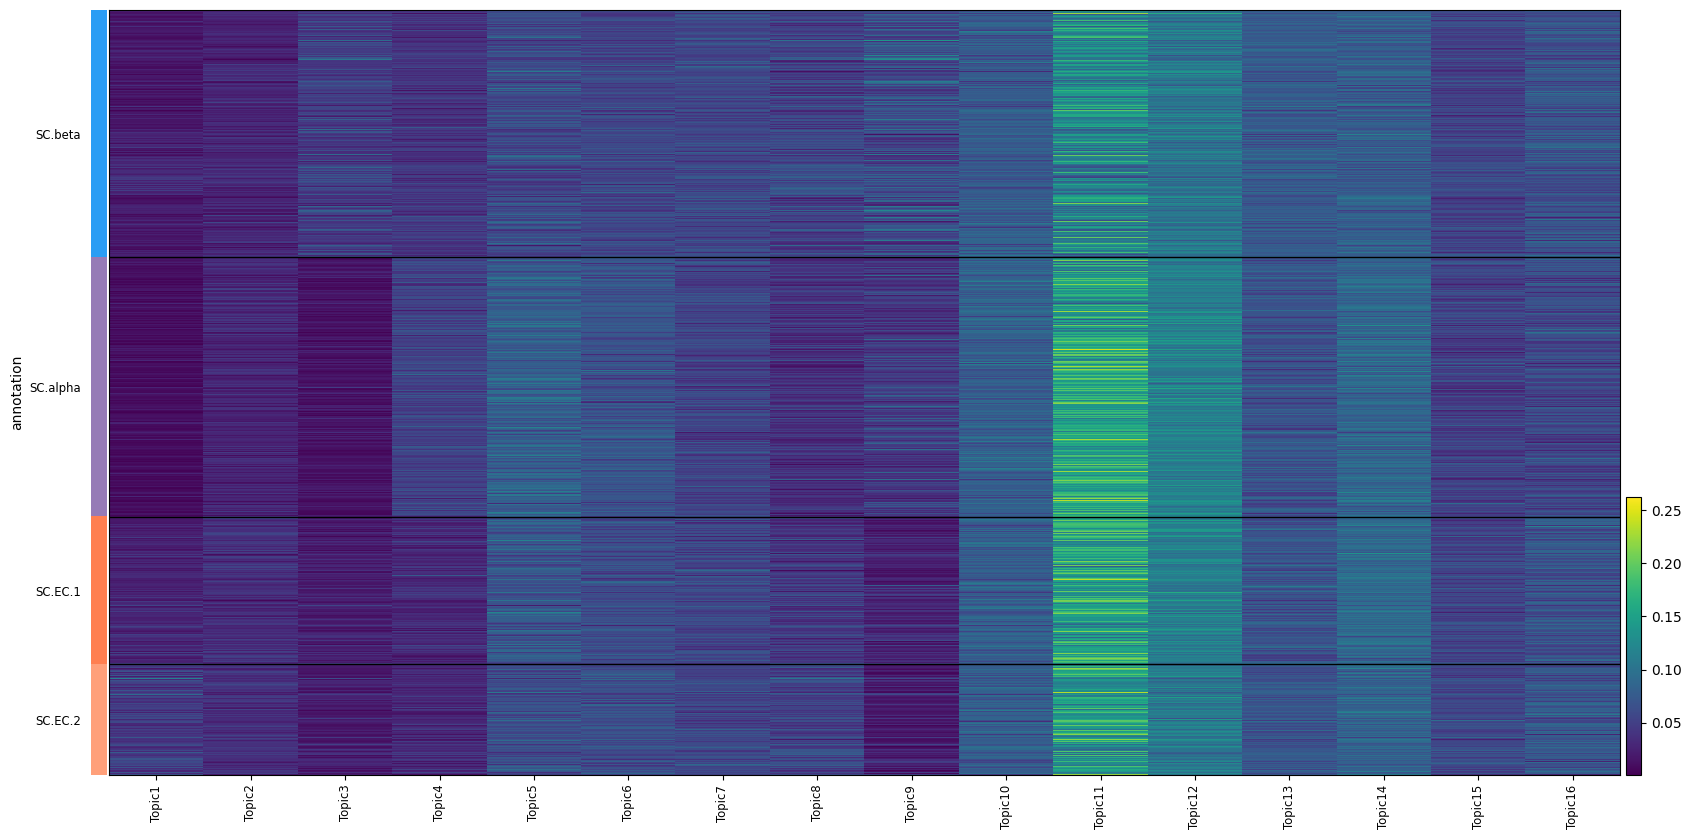

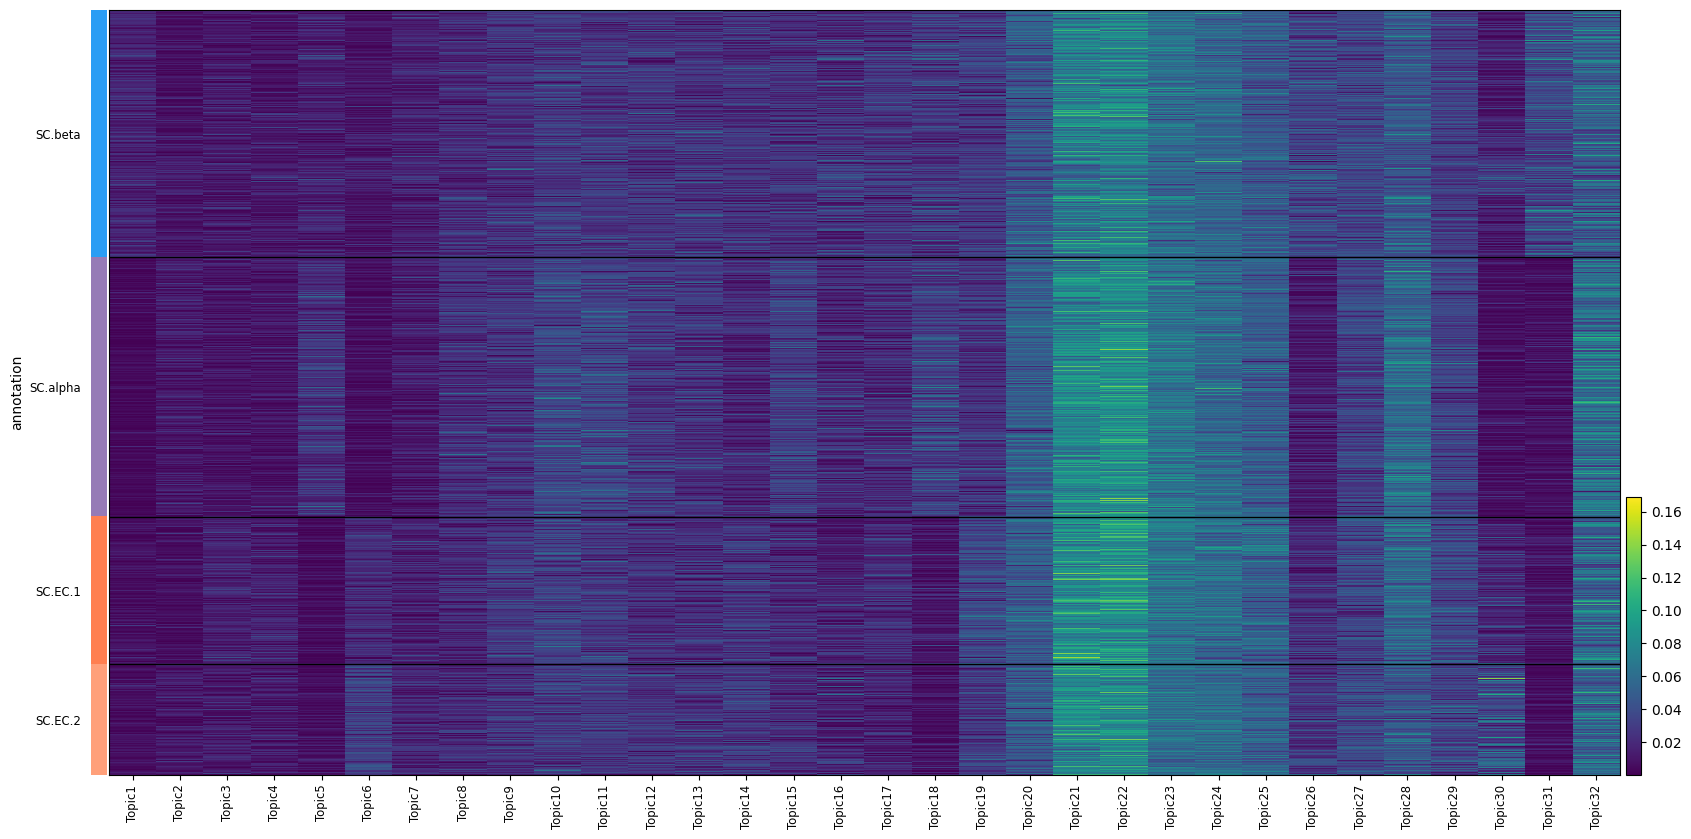

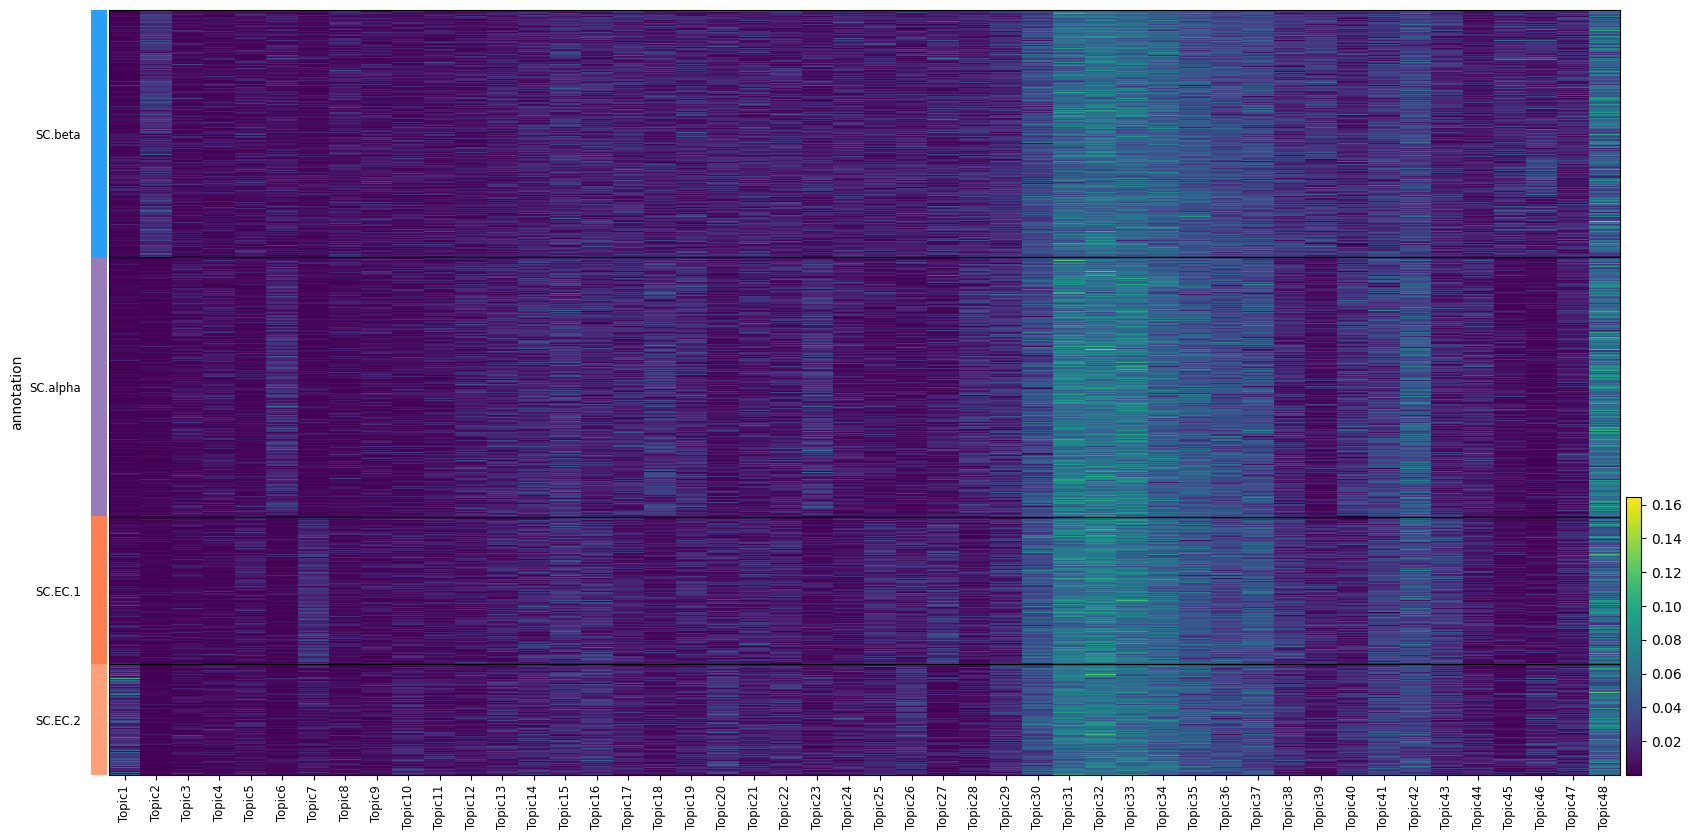

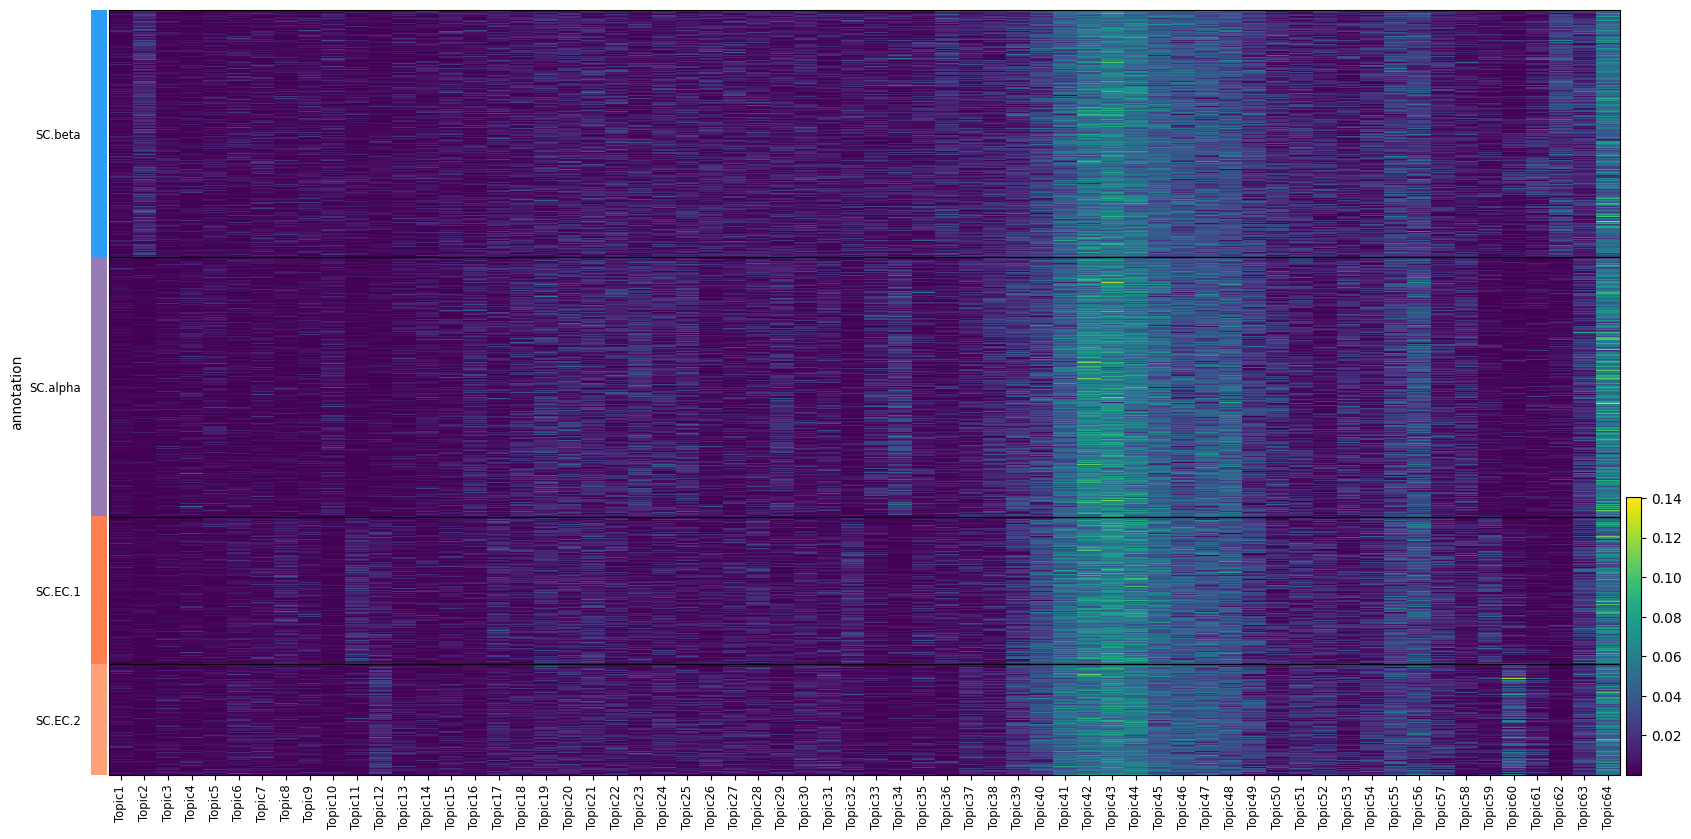

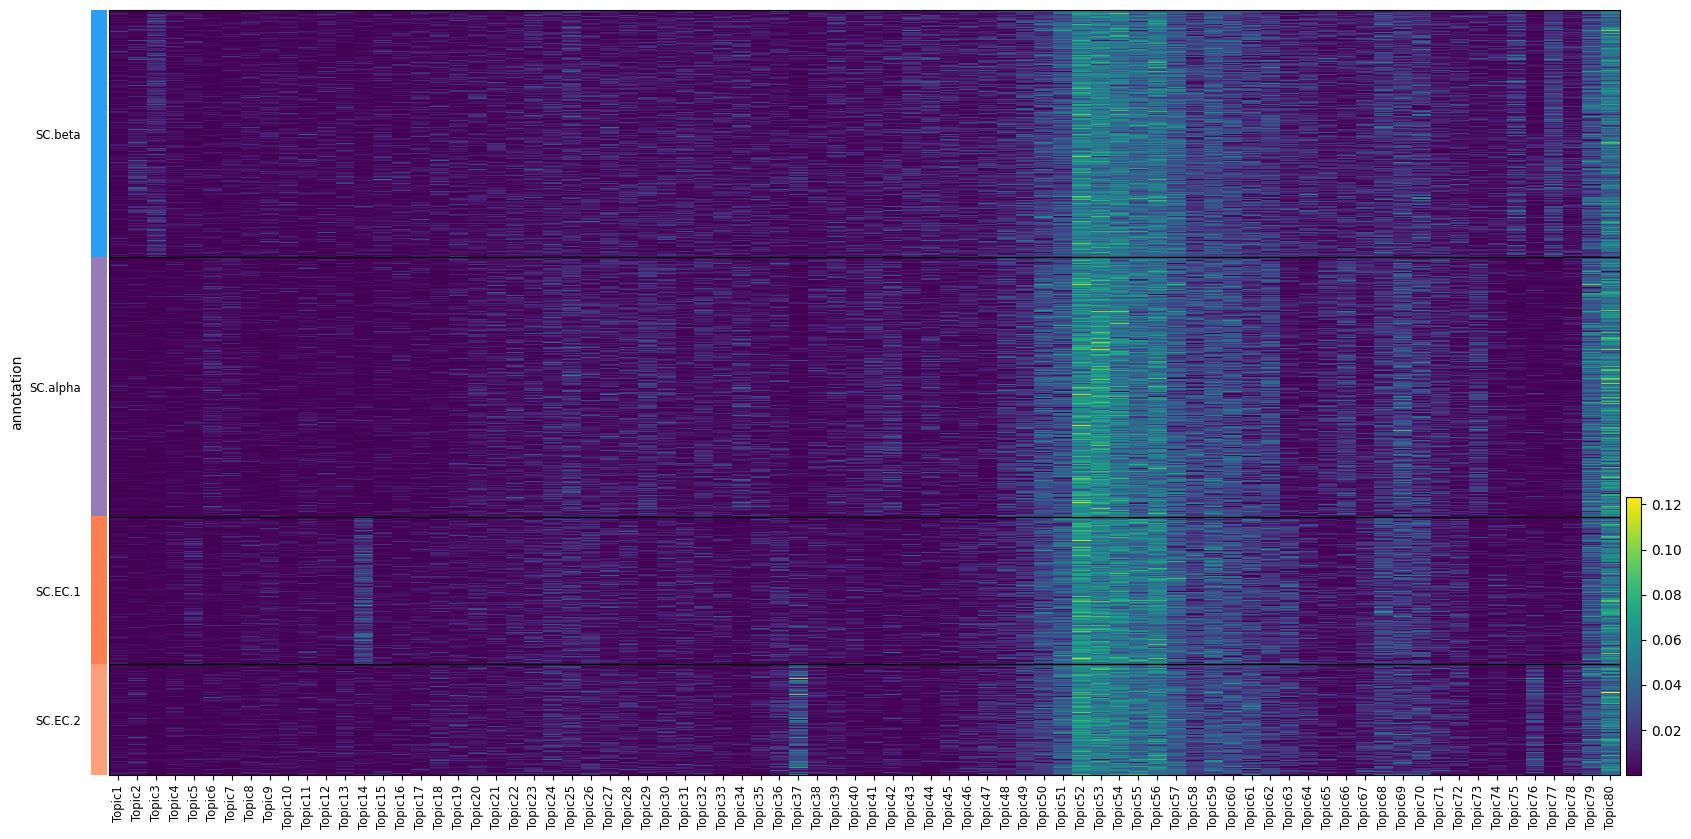

In [302]:
for n_topic in [2, 4, 8, 16, 32, 48, 64, 80]:
    print(f"Running {n_topic} topics")

    # Grab the model
    model = evaluate_models(
        models,
        select_model=n_topic,
        return_model=True,
        metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
        plot_metrics=False,
        plot=False
    )
    cistopic_obj.add_LDA_model(model)

    # Add the cell topic matrix to adata
    cell_topic_df = cistopic_obj.selected_model.cell_topic.copy()
    cell_topic_df.columns = cell_topic_df.columns.str.split("_", expand=True).get_level_values(0)
    cell_topic_df = cell_topic_df[adata.obs_names]
    adata.obsm[f"X_cisTopic_{n_topic}_topics"] = cell_topic_df.values.T
    
    # Run cisTopic UMAP and add to adata
    print("Running cisTopic UMAP")
    run_umap(cistopic_obj, target  = 'cell', scale=False)
    umap_dims = cistopic_obj.projections["cell"]["UMAP"].copy()
    umap_dims.index = umap_dims.index.str.split("_", expand=True).get_level_values(0)
    adata.obsm[f"X_cisTopic_umap_{n_topic}_topics"] = umap_dims.loc[adata.obs.index].values
    
    # Run scanpy UMAP and add to adata
    print("Running scanpy UMAP")
    sc.pp.neighbors(adata, use_rep=f"X_cisTopic_{n_topic}_topics", n_neighbors=30, metric="cosine")
    sc.tl.umap(adata, min_dist=0.1, spread=5, random_state=1234)
    adata.obsm[f"X_scanpy_umap_{n_topic}_topics"] = adata.obsm["X_umap"].copy()

    # Make an anndata where features are the topics
    adata_topics = ad.AnnData(
        X=cell_topic_df.values.copy().T,
        obs=adata.obs.copy(),
        var=pd.DataFrame(index=cell_topic_df.index)
    )
    
    # Remove any colors that are not in the data
    cellid_colors = {k: v for k, v in cellid_colors.items() if k in adata_topics.obs["annotation"].unique()}
    adata_topics.obs["annotation"] = adata_topics.obs["annotation"].astype("category")
    adata_topics.obs["annotation"] = adata_topics.obs["annotation"].cat.reorder_categories(cellid_colors.keys())
    adata_topics.uns["annotation_colors"] = list(cellid_colors.values())

    ax = sc.pl.heatmap(
        adata_topics,
        var_names=adata_topics.var_names,
        groupby="annotation",
        use_raw=False,
        log=False,
        figsize=(20, 10),
        cmap="viridis",
        show=False,
        show_gene_labels=True,
    )
    

Plotting 2 topics
Plotting 4 topics
Plotting 8 topics
Plotting 16 topics
Plotting 32 topics
Plotting 48 topics
Plotting 64 topics


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/

Plotting 80 topics


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


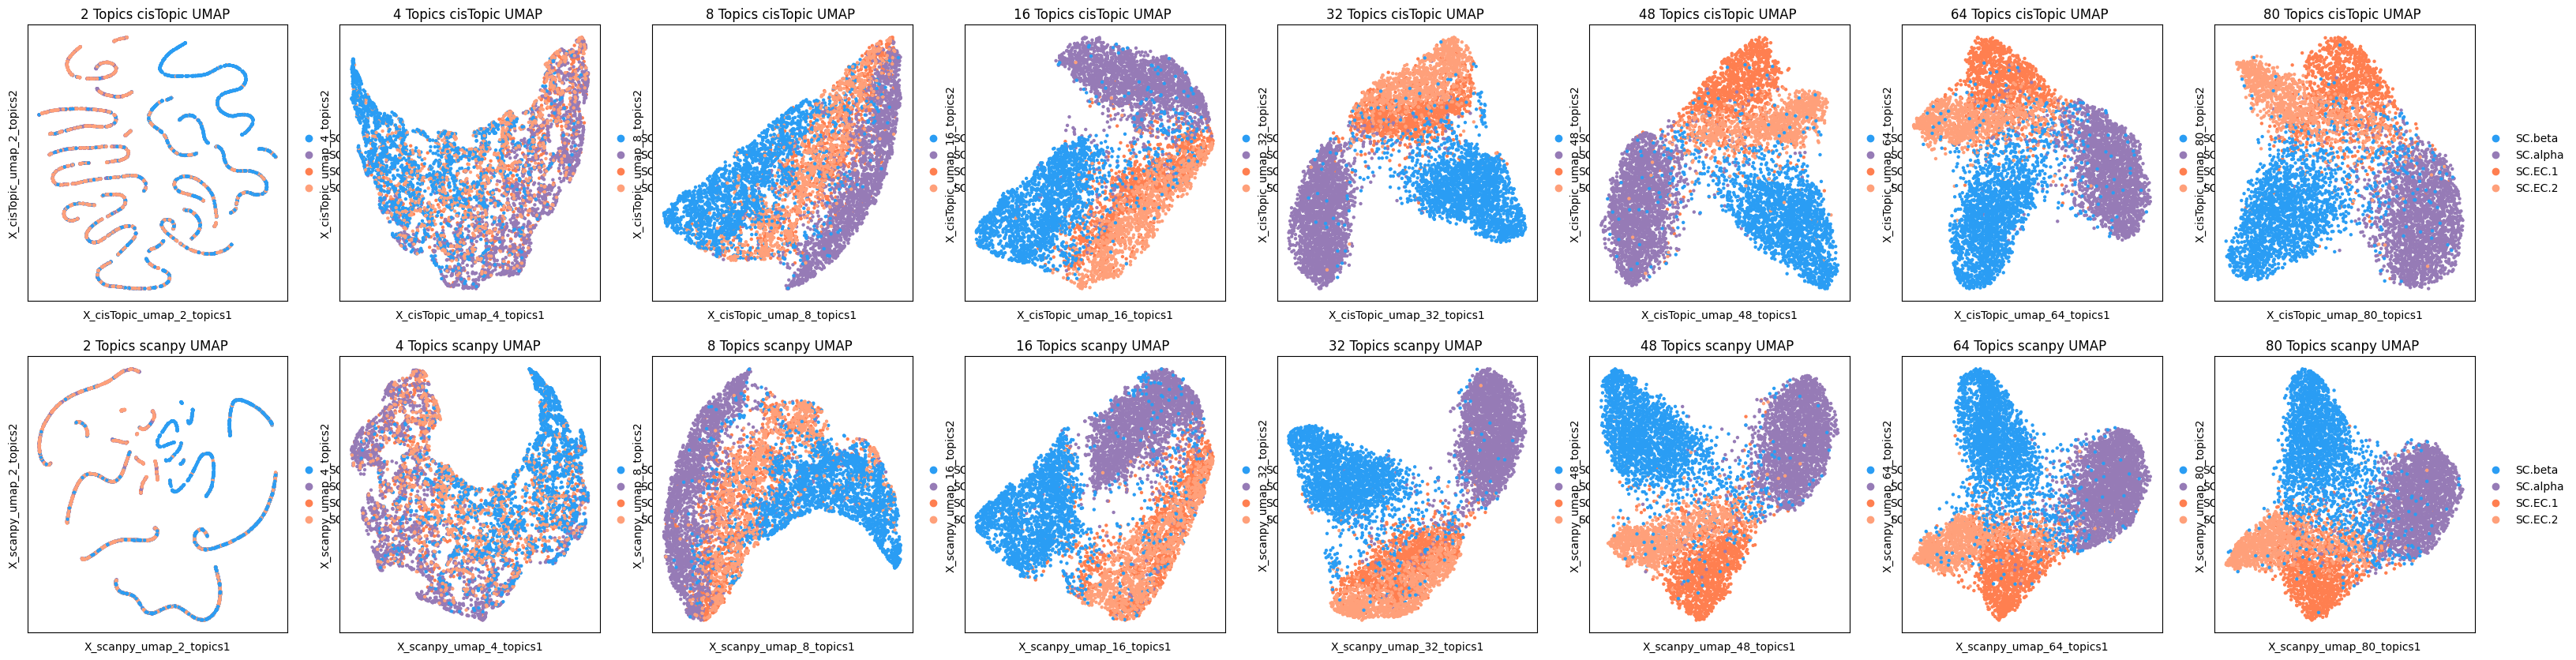

In [305]:
fig, ax = plt.subplots(2, 8, figsize=(40, 10))
metadata = "annotation"
for i, n_topic in enumerate([2, 4, 8, 16, 32, 48, 64, 80]):
    print(f"Plotting {n_topic} topics")
    sc.pl.embedding(adata, basis=f"X_cisTopic_umap_{n_topic}_topics", color=[metadata], s=40, wspace=0.2, ncols=2, show=False, ax=ax[0][i])
    ax[0][i].set_title(f"{n_topic} Topics cisTopic UMAP ")
    sc.pl.embedding(adata, basis=f"X_scanpy_umap_{n_topic}_topics", color=[metadata], s=40, wspace=0.2, ncols=2, show=False, ax=ax[1][i])
    ax[1][i].set_title(f"{n_topic} Topics scanpy UMAP ")

/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


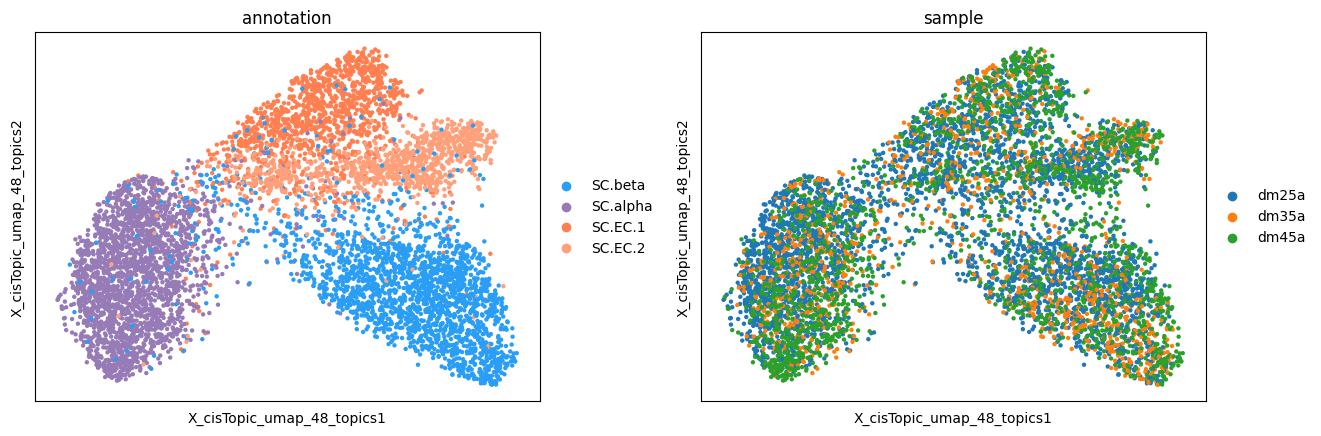

In [307]:
sc.pl.embedding(adata, basis="X_cisTopic_umap_48_topics", color=["annotation", "sample"], s=40, wspace=0.2, ncols=2)

# Choose one model

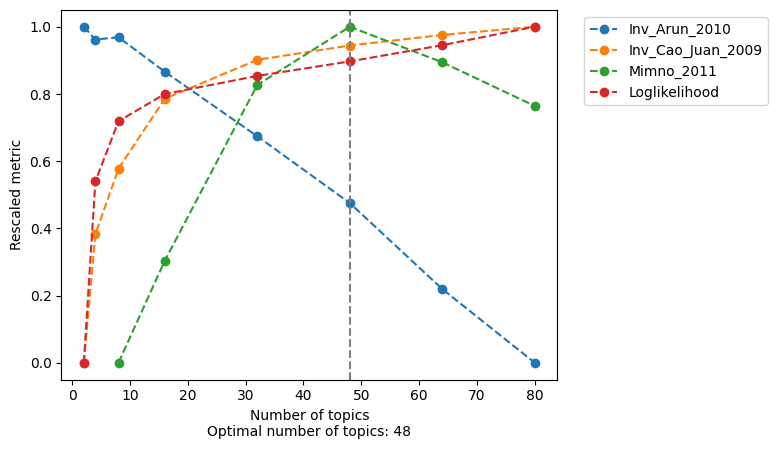

In [374]:
# Grab the model
model = evaluate_models(
    models,
    select_model=48,
    return_model=True,
    metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
    plot_metrics=False,
)
cistopic_obj.add_LDA_model(model)

In [375]:
# Add the cell topic matrix to adata
cell_topic_df = cistopic_obj.selected_model.cell_topic.copy()
cell_topic_df.columns = cell_topic_df.columns.str.split("_", expand=True).get_level_values(0)
cell_topic_df = cell_topic_df[adata.obs_names]
cell_topic_df.head()

dm25a#AAACAGCCATTGTGCA-1  dm25a#AAACATGCAATTGAGA-1  \
Topic1                  0.015507                  0.002082   
Topic2                  0.002779                  0.000421   
Topic3                  0.000565                  0.004298   
Topic4                  0.000842                  0.000283   
Topic5                  0.013847                  0.015512   

        dm25a#AAACCGAAGCCATCAG-1  dm25a#AAACCGGCAGGTTACC-1  \
Topic1                  0.006079                  0.003831   
Topic2                  0.000369                  0.000625   
Topic3                  0.013368                  0.007452   
Topic4                  0.004621                  0.014589   
Topic5                  0.015797                  0.010141   

        dm25a#AAACCGGCAGTTATCG-1  dm25a#AAACGCGCACAAAGAC-1  \
Topic1                  0.009438                  0.009281   
Topic2                  0.001316                  0.005883   
Topic3                  0.002102                  0.007427   
Topic4                  0.003412                  0.005265   
Topic5                  0.008390                  0.005883   

        dm25a#AAACGTACATTGTCAG-1  dm25a#AAAGCACCAGCTCATA-1  \
Topic1                  0.005967                  0.014873   
Topic2                  0.001333                  0.000778   
Topic3                  0.007732                  0.008016   
Topic4                  0.010821                  0.009159   
Topic5                  0.006187                  0.006111   

        dm25a#AAAGCCGCAACAGCCT-1  dm25a#AAAGCCGCACAAAGGT-1  ...  \
Topic1                  0.000920                  0.002773  ...   
Topic2                  0.000237                  0.000470  ...   
Topic3                  0.000237                  0.003464  ...   
Topic4                  0.004790                  0.002082  ...   
Topic5                  0.005017                  0.006689  ...   

        dm45a#TGCTTCATCCGGTTAG-1  dm45a#TGCTTCATCTTAGGGT-1  \
Topic1                  0.010690                  0.003203   
Topic2                  0.011573                  0.007110   
Topic3                  0.000975                  0.011904   
Topic4                  0.010337                  0.005512   
Topic5                  0.012545                  0.009595   

        dm45a#TGCTTGTGTCCTTCTC-1  dm45a#TGGTGATTCTGGCTTC-1  \
Topic1                  0.036562                  0.003480   
Topic2                  0.013682                  0.026332   
Topic3                  0.005060                  0.003213   
Topic4                  0.008127                  0.002812   
Topic5                  0.006552                  0.005084   

        dm45a#TGTTGCACACTCGCTC-1  dm45a#TTAACTGAGGAACCAA-1  \
Topic1                  0.016160                  0.015949   
Topic2                  0.018236                  0.013218   
Topic3                  0.005058                  0.004849   
Topic4                  0.005058                  0.018152   
Topic5                  0.009932                  0.003351   

        dm45a#TTACGTTTCATGTCAA-1  dm45a#TTACGTTTCCTCATGC-1  \
Topic1                  0.014945                  0.007473   
Topic2                  0.013235                  0.019183   
Topic3                  0.001804                  0.011530   
Topic4                  0.019266                  0.004799   
Topic5                  0.010445                  0.003784   

        dm45a#TTCAGCACACTCGCTC-1  dm45a#TTTCGTCCAGCTCATA-1  
Topic1                  0.005112                  0.025346  
Topic2                  0.026654                  0.011781  
Topic3                  0.006001                  0.007575  
Topic4                  0.010331                  0.003580  
Topic5                  0.000782                  0.007575  

[5 rows x 6798 columns]

In [376]:
# Make an anndata where features are the topics
adata_topics = ad.AnnData(
    X=cell_topic_df.values.copy().T,
    obs=adata.obs.copy(),
    var=pd.DataFrame(index=cell_topic_df.index)
)
adata_topics.obsm["X_cisTopic"] = cell_topic_df.values.T

In [377]:
# Run cisTopic UMAP
run_umap(cistopic_obj, target='cell', scale=False)

2024-03-20 13:32:54,328 cisTopic     INFO     Running UMAP


/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [378]:
# Add to adata
umap_dims = cistopic_obj.projections["cell"]["UMAP"].copy()
umap_dims.index = umap_dims.index.str.split("_", expand=True).get_level_values(0)
adata_topics.obsm[f"X_umap"] = umap_dims.loc[adata_topics.obs.index].values

In [379]:
# Remove any colors that are not in the data
cellid_colors = {k: v for k, v in cellid_colors.items() if k in adata_topics.obs["annotation"].unique()}
adata_topics.obs["annotation"] = adata_topics.obs["annotation"].astype("category")
adata_topics.obs["annotation"] = adata_topics.obs["annotation"].cat.reorder_categories(cellid_colors.keys())
adata_topics.uns["annotation_colors"] = list(cellid_colors.values())

/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


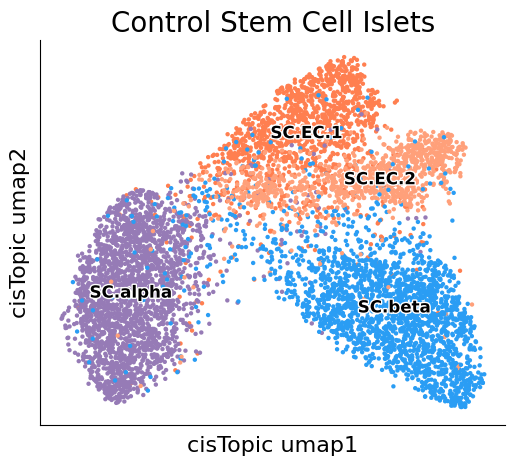

In [380]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))
sc.pl.umap(
    adata_topics, 
    color=["annotation"], 
    s=40, 
    show=False, 
    frameon=False, 
    legend_loc="on data",
    legend_fontsize=12,
    legend_fontoutline=2,
    ax=ax
)
ax.axis("on")
ax.tick_params(
    top="off",
    bottom="on",
    left="on",
    right="off",
    labelleft="on",
    labelbottom="off",
)
_ = ax.set_xlabel("cisTopic umap1", fontsize=16)
_ = ax.set_ylabel("cisTopic umap2", fontsize=16)
_ = ax.set_title("Control Stem Cell Islets", fontsize=20)

#ax.set(frame_on=False)
# Set bottom and left spines to on
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


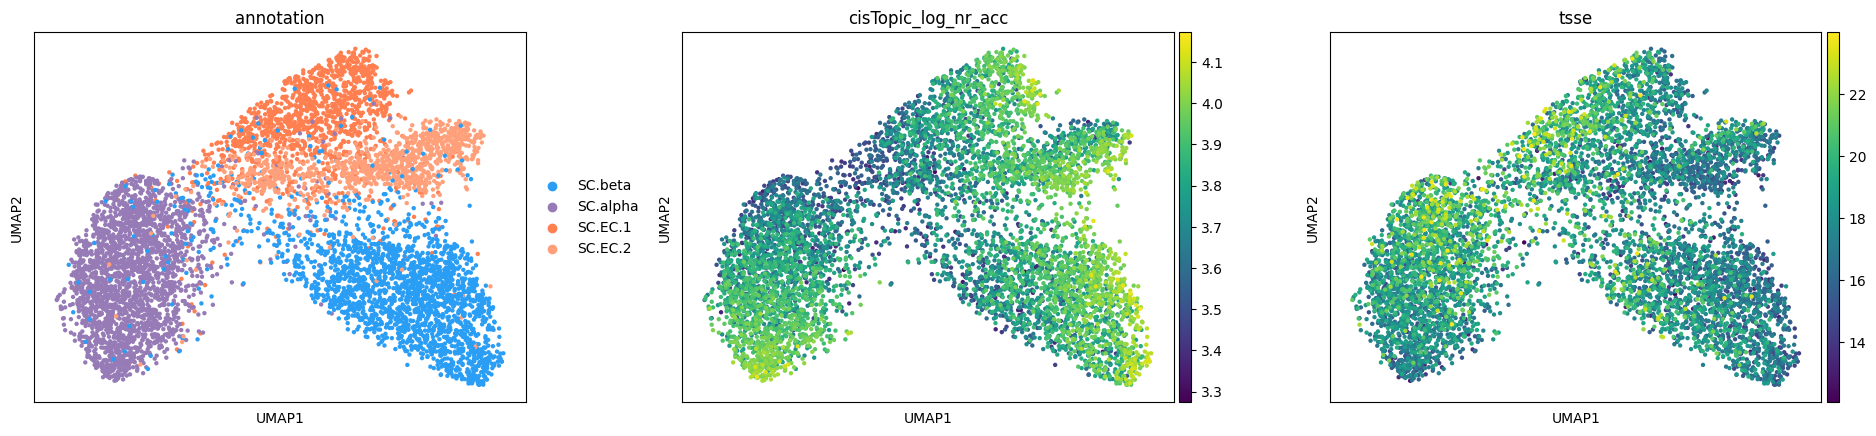

In [381]:
# Plot UMAP
sc.pl.umap(adata_topics, color=["annotation", "cisTopic_log_nr_acc", "tsse"], s=40, wspace=0.2, ncols=3)

In [382]:
# Add scaled data layer
adata_topics.layers["scaled"] = sc.pp.scale(adata_topics, copy=True).X

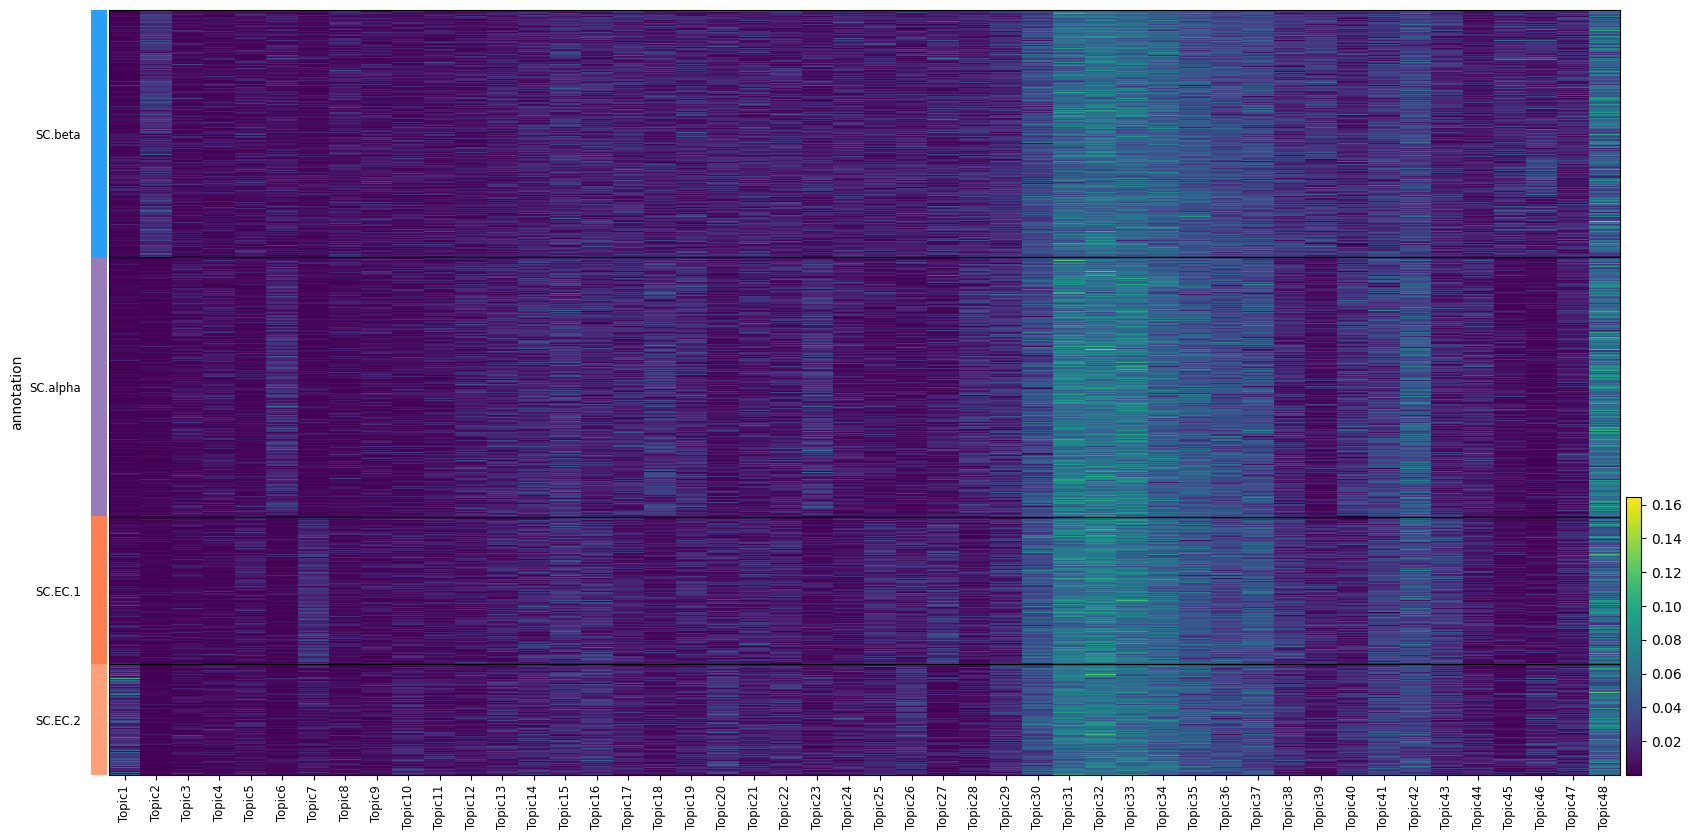

In [383]:
# Plot as heatmap
ax = sc.pl.heatmap(
    adata_topics,
    var_names=adata_topics.var_names,
    groupby="annotation",
    use_raw=False,
    log=False,
    figsize=(20, 10),
    cmap="viridis",
    #layer="scaled",
    show=False,
    show_gene_labels=True,
    #vmin=-2,
    #vmax=4,
)

In [384]:
sc.tl.rank_genes_groups(adata_topics, groupby="annotation", method="wilcoxon", n_genes=10)

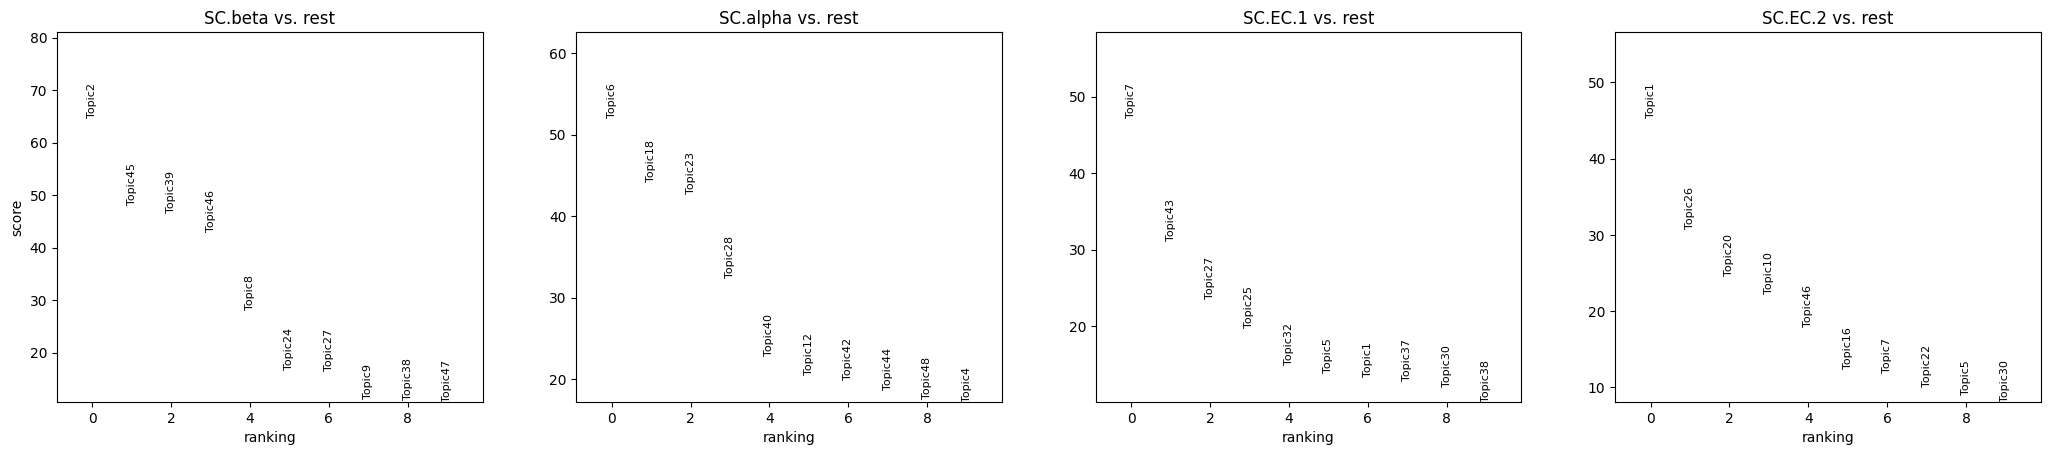

In [385]:
sc.pl.rank_genes_groups(adata_topics, n_genes=10, sharey=False)

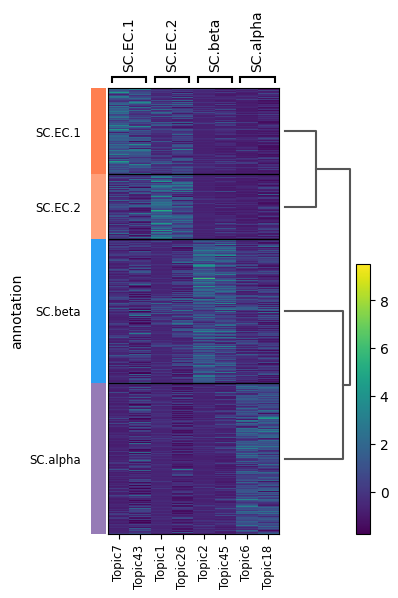

In [386]:
sc.pl.rank_genes_groups_heatmap(adata_topics, groupby="annotation", n_genes=2, use_raw=False, log=False, show_gene_labels=True, layer="scaled", cmap="viridis")

In [387]:
# Get dictionary of top 2 marker genes for each annotation
marker_topics = {}
for annotation in adata_topics.obs["annotation"].unique():
    marker_genes = adata_topics.uns["rank_genes_groups"]["names"][annotation]
    marker_topics[annotation] = marker_genes[:3]
marker_topics

order = ["SC.beta", "SC.alpha", "SC.EC.1", "SC.EC.2"]
marker_topics = {k: v for k, v in marker_topics.items() if k in order}

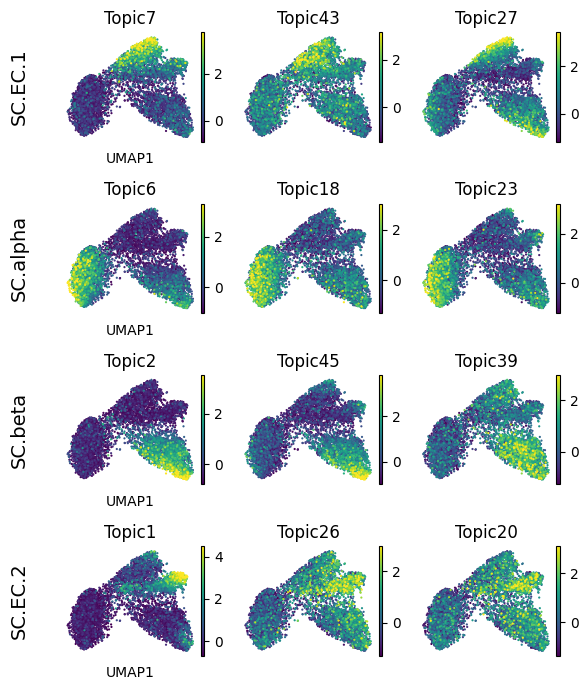

In [388]:
nrow = len(marker_topics)
ncol = max([len(vs) for vs in marker_topics.values()])
fig, axs = plt.subplots(nrow, ncol, figsize=(2 * ncol, 1.75 * nrow))
for row_idx, (annotation, markers) in enumerate(marker_topics.items()):
    col_idx = 0
    for marker in markers:
        ax = axs[row_idx, col_idx]
        sc.pl.umap(adata_topics, color=marker, ax=ax, show=False, frameon=False, s=10, vmin="p5", vmax="p99.5", layer="scaled")
        if col_idx == 0:
            # We disabled axis drawing in UMAP to have plots without background and border
            # so we need to re-enable axis to plot the ylabel
            ax.axis("on")
            ax.tick_params(
                top="off",
                bottom="off",
                left="off",
                right="off",
                labelleft="on",
                labelbottom="off",
            )
            ax.set_ylabel(annotation + "\n", rotation=90, fontsize=14)
            ax.set(frame_on=False)
        col_idx += 1
    # Remove unused column Axes in the current row
    while col_idx < ncol:
        axs[row_idx, col_idx].remove()
        col_idx += 1
        
# Alignment within the Figure
fig.tight_layout()

In [389]:
sc.pp.neighbors(adata_topics, use_rep="X_cisTopic", n_neighbors=30, metric="cosine")

In [390]:
sc.tl.leiden(adata_topics, resolution=0.2, key_added="leiden_0.2_32_topics")
sc.tl.leiden(adata_topics, resolution=0.5, key_added="leiden_0.5_32_topics")
sc.tl.leiden(adata_topics, resolution=0.8, key_added="leiden_0.8_32_topics")
sc.tl.leiden(adata_topics, resolution=1.0, key_added="leiden_1.0_32_topics")
sc.tl.leiden(adata_topics, resolution=1.5, key_added="leiden_1.5_32_topics")

/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/

[<AxesSubplot: title={'center': 'leiden_0.2'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'leiden_0.5'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'leiden_0.8'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'leiden_1'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'leiden_1.5'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot: title={'center': 'annotation'}, xlabel='UMAP1', ylabel='UMAP2'>]

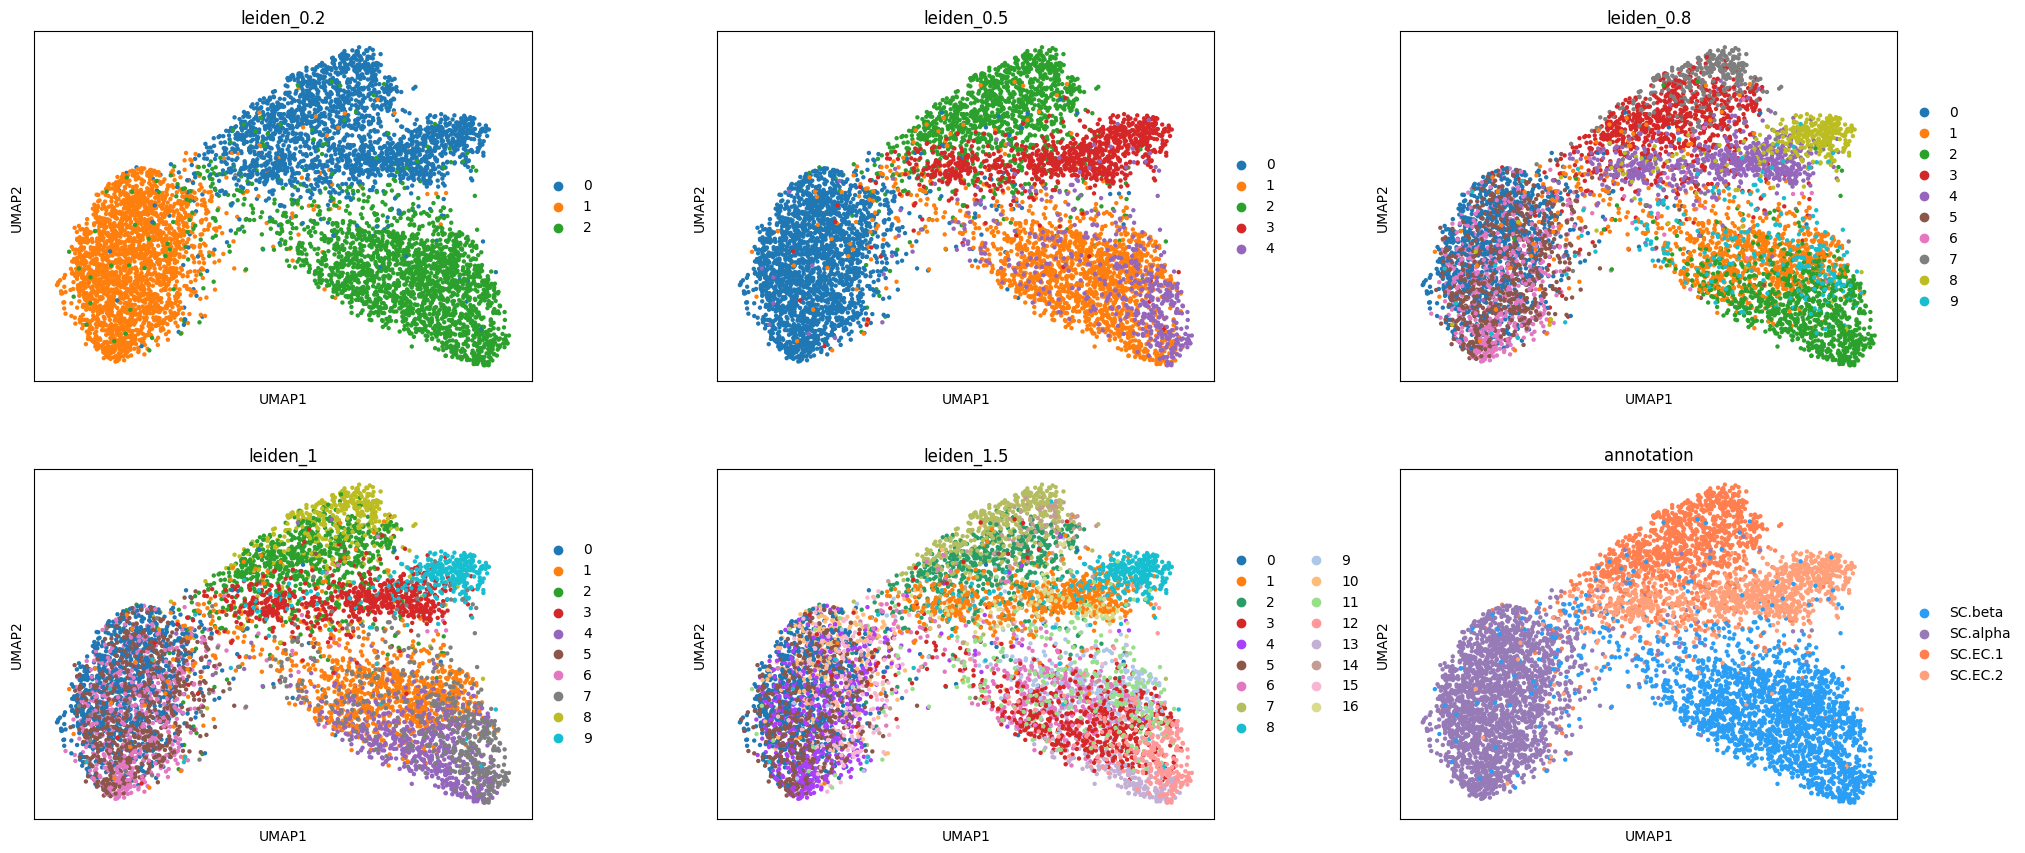

In [391]:
# Check different clustering res
sc.pl.umap(adata_topics, color=["leiden_0.2", "leiden_0.5", "leiden_0.8", "leiden_1", "leiden_1.5", "annotation"], ncols=3, s=40, wspace=0.25, show=False)

Text(0.5, 1.0, 'Annotation proportions in leiden_0.5 clusters')

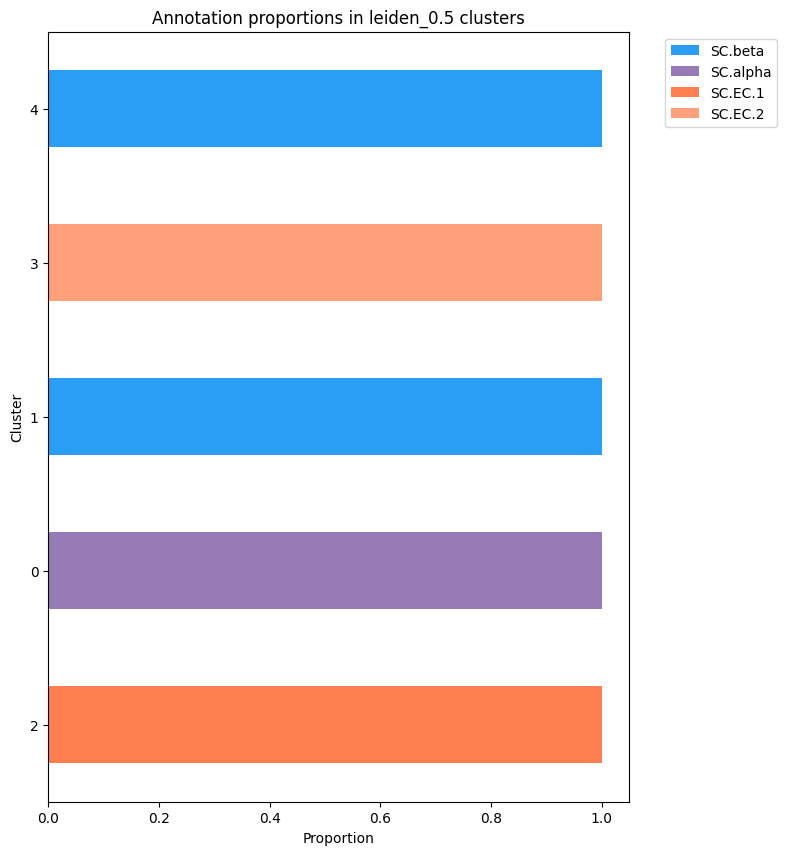

In [392]:
# Stacked barplot of annotation proportions in leiden_0.5 clusters
leiden = adata_topics.obs["leiden_0.5"].unique().tolist()
annotation_proportions = []
for cluster in leiden:
    proportions = adata_topics.obs[adata_topics.obs["leiden_0.5"] == cluster]["annotation"].value_counts(normalize=True)
    proportions.name = cluster
    annotation_proportions.append(proportions)
annotation_proportions = pd.concat(annotation_proportions, axis=1).T
annotation_proportions = annotation_proportions[cellid_colors.keys()]

# Plot horizontal barplot, legend outside to right
fig, ax = plt.subplots(figsize=(7.5, 10))
annotation_proportions.plot.barh(stacked=True, ax=ax, color=cellid_colors.values())
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Proportion")
plt.ylabel("Cluster")
plt.title("Annotation proportions in leiden_0.5 clusters")

/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 41.972222222222314, 'Topic')

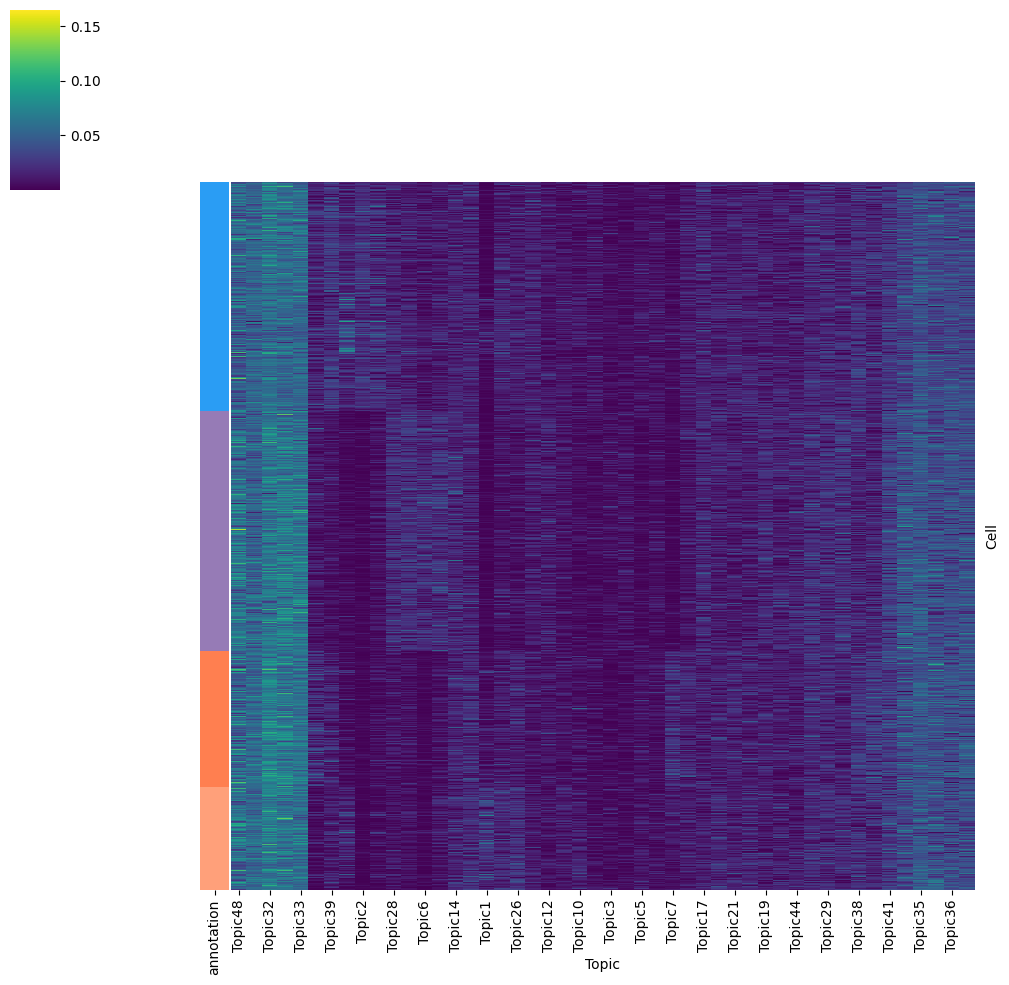

In [393]:
# Clustermap of topics
labels = adata_topics.obs["annotation"]
row_colors = labels.map(cellid_colors)
row_colors.index = adata_topics.obs_names

# Sort the rows by annotation
cell_ordering = adata.obs.sort_values("annotation").index
df = adata_topics.to_df()
df = df.loc[cell_ordering]

ax = sns.clustermap(
    df,
    row_cluster=False,
    col_cluster=True,
    yticklabels=False,
    cmap="viridis",
    row_colors=row_colors,
)

# Add row colors from adata.obs["annotation"]
ax.ax_row_dendrogram.set_visible(False)

ax.ax_col_dendrogram.set_visible(False)
ax.ax_heatmap.set_ylabel("Cell")
ax.ax_heatmap.set_xlabel("Topic")


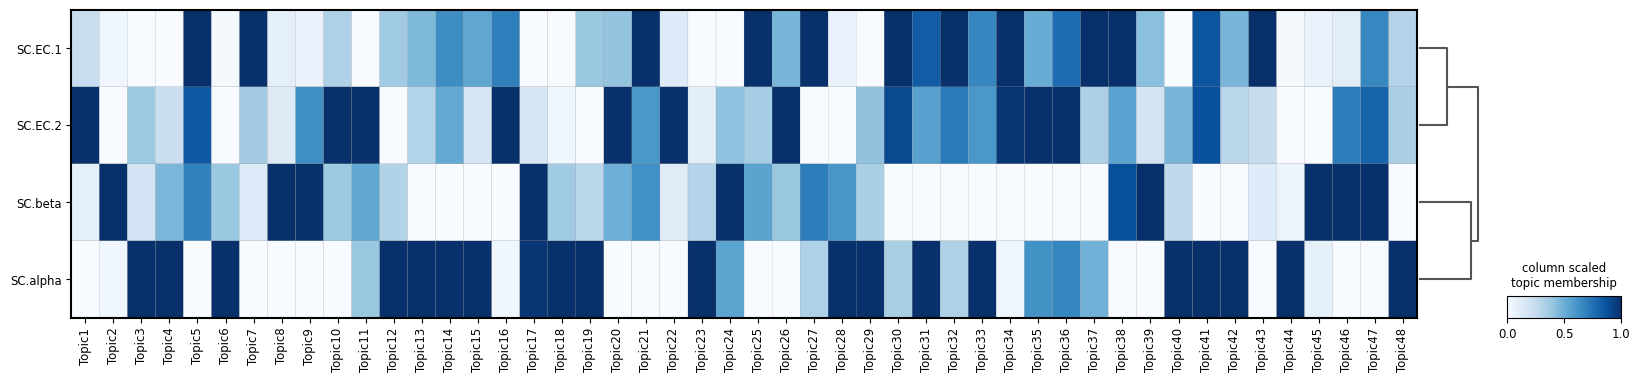

In [394]:
sc.pl.matrixplot(
    adata_topics,
    var_names=adata_topics.var_names,
    groupby="annotation",
    dendrogram=True,
    cmap="Blues",
    standard_scale="var",
    colorbar_title="column scaled\ntopic membership",
    figsize=(20, 4),
)

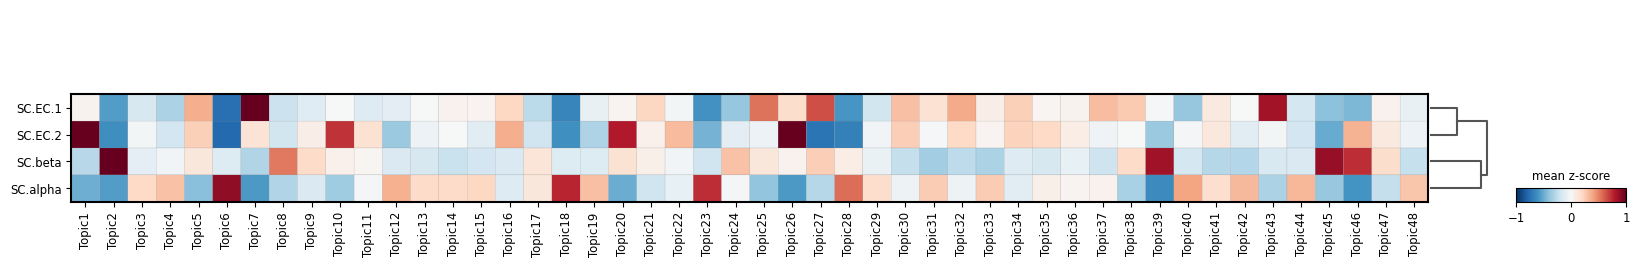

In [395]:
sc.pl.matrixplot(
    adata_topics,
    var_names=adata_topics.var_names,
    groupby="annotation",
    dendrogram=True,
    colorbar_title="mean z-score",
    layer="scaled",
    vmin=-1,
    vmax=1,
    cmap="RdBu_r",
)

# Cistopic UMAP

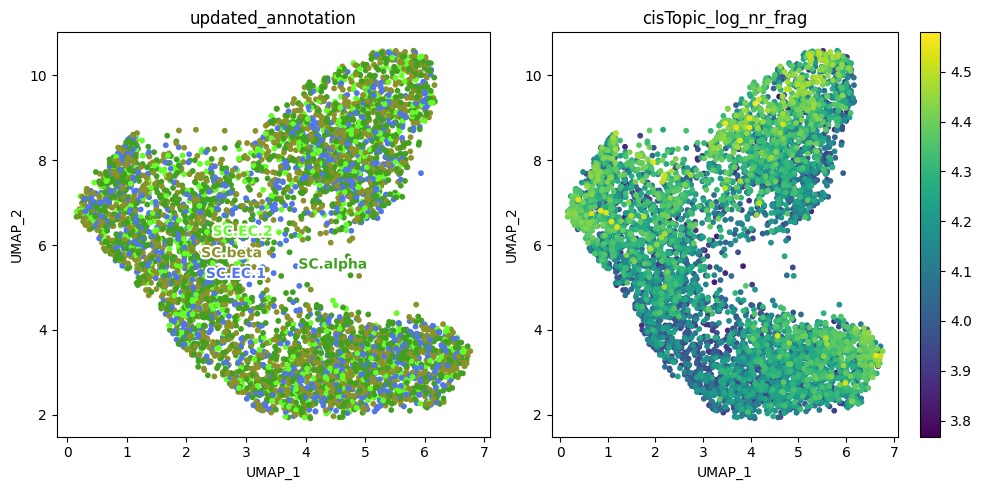

In [245]:
plot_metadata(cistopic_obj,
    reduction_name='UMAP',
    variables=["updated_annotation", "cisTopic_log_nr_frag"],
    target='cell', 
    num_columns=3,
    text_size=10,
    dot_size=10,
    figsize=(15, 5),
    color_dictionary={"updated_annotation": cellid_colors}
)

/cellar/users/aklie/opt/miniconda3/envs/test_scenicplus/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


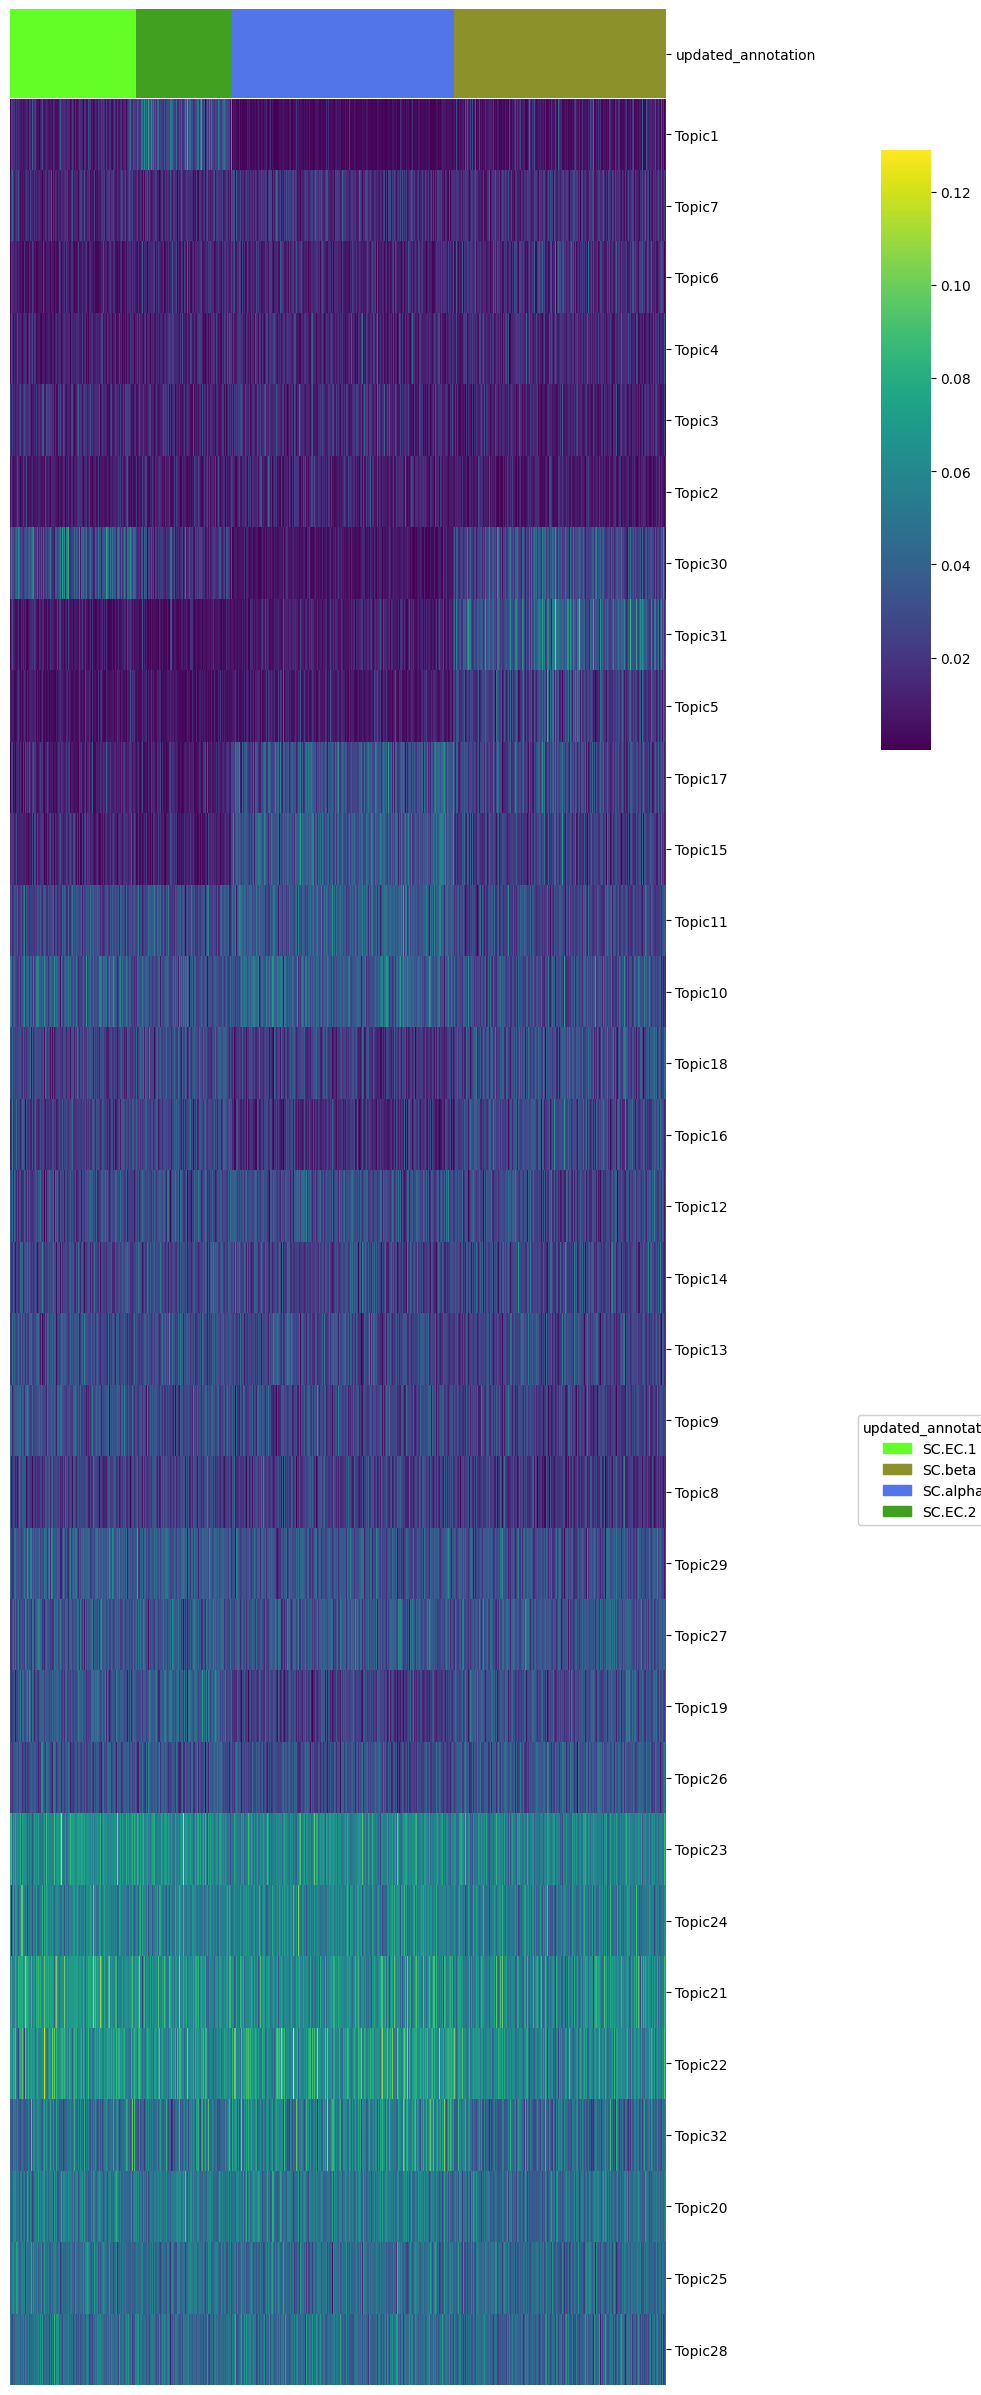

In [ ]:
cell_topic_heatmap(
    cistopic_obj,
    variables = ['updated_annotation'],
    scale = False,
    legend_loc_x = 1.05,
    legend_loc_y = -1.2,
    legend_dist_y = -1,
    figsize=(10,30),
    harmony=False,
    cluster_topics=True,
    color_dict={"updated_annotation": cellid_colors}
)

In [270]:
obj = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/pycistopic/filtered_signac/A2_control_filtered_signac_peakset.pkl"

In [271]:
# Load cisTopic object
cistopic_obj = pickle.load(open(obj, "rb"))
cistopic_obj

In [274]:
cistopic_obj.cell_data["sample_id"]

dm25a#AAACAGCCATTGTGCA-1___A2_control_filtered_signac_peakset    dm25a
dm25a#AAACATGCAATTGAGA-1___A2_control_filtered_signac_peakset    dm25a
dm25a#AAACCAACAGTAGCCT-1___A2_control_filtered_signac_peakset    dm25a
dm25a#AAACCAACAGTCTAAT-1___A2_control_filtered_signac_peakset    dm25a
dm25a#AAACCAACATAAGCAA-1___A2_control_filtered_signac_peakset    dm25a
                                                                 ...  
dm45a#TTTGGTAAGCTGAGGG-1___A2_control_filtered_signac_peakset    dm45a
dm45a#TTTGGTAAGGTGCGGA-1___A2_control_filtered_signac_peakset    dm45a
dm45a#TTTGTCCCATCCATCT-1___A2_control_filtered_signac_peakset    dm45a
dm45a#TTTGTGAAGGAGTCTT-1___A2_control_filtered_signac_peakset    dm45a
dm45a#TTTGTGGCATAATGAG-1___A2_control_filtered_signac_peakset    dm45a
Name: sample_id, Length: 6798, dtype: object